In [1]:
### CUSTOMER CHURN PREDICTION in TELECOM

### Loading libraries and data

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [4]:
#loading data
df = pd.read_csv('D:/Domain Specific Data Science Projects/Telecom Churn Prediction/Telco_Customer_Churn.csv')

### Undertanding the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

In [7]:
df.shape

(7043, 21)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### ===== Feature Type Classification =====

In [11]:
# Identify numerical and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Separate discrete and continuous numeric columns
discrete_numeric_cols = [col for col in numeric_cols if df[col].nunique() < 250]
continuous_numeric_cols = [col for col in numeric_cols if col not in discrete_numeric_cols]

# Print results
print(f"Numeric columns: {len(numeric_cols)}")
print(f"Discrete numeric columns: {len(discrete_numeric_cols)}")
print(f"Continuous numeric columns: {len(continuous_numeric_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")


Numeric columns: 3
Discrete numeric columns: 2
Continuous numeric columns: 1
Categorical columns: 17


### ==== Column-wise EDA Metrics ====

In [12]:
# Dataset profiling summary
profile_df = pd.DataFrame({
    'count': df.shape[0],
    'nulls': df.isnull().sum(),
    'nulls%': (df.isnull().mean() * 100).round(2),
    'cardinality': df.nunique(),
    'datatype': df.dtypes
})
# Dataset-level duplicates (entire row duplicates)
total_duplicates = df.duplicated().sum()

print(f"🔍 Dataset Profile (row count: {df.shape[0]}, columns: {df.shape[1]})")
print(f"📌 Total duplicated rows in dataset: {total_duplicates}")
profile_df

🔍 Dataset Profile (row count: 7043, columns: 20)
📌 Total duplicated rows in dataset: 22


,count,nulls,nulls%,cardinality,datatype
gender,7043,0,0.0,2,object
SeniorCitizen,7043,0,0.0,2,int64
Partner,7043,0,0.0,2,object
Dependents,7043,0,0.0,2,object
tenure,7043,0,0.0,73,int64
PhoneService,7043,0,0.0,2,object
MultipleLines,7043,0,0.0,3,object
InternetService,7043,0,0.0,3,object
OnlineSecurity,7043,0,0.0,3,object
OnlineBackup,7043,0,0.0,3,object


In [13]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Here we see that the TotalCharges has 11 missing values. Let's check this data.

In [14]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.
Let's see if there are any other 0 values in the tenure column.

In [15]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

There are no additional missing values in the Tenure column.
Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [16]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

To solve the problem of missing values in TotalCharges column, I decided to fill it with the median of TotalCharges values.

In [17]:
df.fillna(df["TotalCharges"].median())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [18]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### ===== Unique Values Check =====

In [20]:
for col in df.columns:
    unique_count = df[col].nunique(dropna=False)
    sample_values = df[col].dropna().unique()[:10]  # Show only first 10 unique values
    
    print(f"Column: {col}")
    print(f"Unique Values Count: {unique_count}")
    print(f"Sample Unique Values: {sample_values}\n")

Column: gender
Unique Values Count: 2
Sample Unique Values: ['Female' 'Male']

Column: SeniorCitizen
Unique Values Count: 2
Sample Unique Values: ['No' 'Yes']

Column: Partner
Unique Values Count: 2
Sample Unique Values: ['Yes' 'No']

Column: Dependents
Unique Values Count: 2
Sample Unique Values: ['No' 'Yes']

Column: tenure
Unique Values Count: 72
Sample Unique Values: [ 1 34  2 45  8 22 10 28 62 13]

Column: PhoneService
Unique Values Count: 2
Sample Unique Values: ['No' 'Yes']

Column: MultipleLines
Unique Values Count: 3
Sample Unique Values: ['No phone service' 'No' 'Yes']

Column: InternetService
Unique Values Count: 3
Sample Unique Values: ['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity
Unique Values Count: 3
Sample Unique Values: ['No' 'Yes' 'No internet service']

Column: OnlineBackup
Unique Values Count: 3
Sample Unique Values: ['Yes' 'No' 'No internet service']

Column: DeviceProtection
Unique Values Count: 3
Sample Unique Values: ['No' 'Yes' 'No internet service']

Colu

### Outlier Detection (Numerical Columns)

In [21]:
for col in continuous_numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")

MonthlyCharges: 0 outliers


### ===== Data Type Optimization =====

In [22]:
# Initial memory usage
start_mem = df.memory_usage(deep=True).sum() / 1024**2
print(f"Initial Memory Usage: {start_mem:.2f} MB")

# Optimize numeric columns
for col in df.select_dtypes(include=["int64", "float64"]).columns:
    col_min, col_max = df[col].min(), df[col].max()
    if pd.api.types.is_integer_dtype(df[col]):
        # Downcast integer
        df[col] = pd.to_numeric(df[col], downcast='integer')
    else:
        # Downcast float
        df[col] = pd.to_numeric(df[col], downcast='float')

# Optimize object columns (low cardinality → category)
for col in df.select_dtypes(include=["object"]).columns:
    num_unique_values = df[col].nunique()
    num_total_values = len(df[col])
    if num_unique_values / num_total_values < 0.5:  # 50% threshold
        df[col] = df[col].astype("category")

# Final memory usage
end_mem = df.memory_usage(deep=True).sum() / 1024**2
print(f"Optimized Memory Usage: {end_mem:.2f} MB")
print(f"Memory Reduced by: {100 * (start_mem - end_mem) / start_mem:.1f}%")


Initial Memory Usage: 6.44 MB
Optimized Memory Usage: 0.23 MB
Memory Reduced by: 96.4%


### Why this is good for a Data Engineering pipeline

Works dynamically for any dataset without hardcoding column names.
    
Uses safe downcasting (no precision loss).
¶
Avoids converting high-cardinality text columns to category (which can slow processing).

Prints memory reduction stats — very useful for large datasets

In [23]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   int8    
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 non-nu

### PostgreSQL Data Loader

In [24]:
from sqlalchemy import create_engine
import pandas as pd

# Example: your cleaned DataFrame is named df
# Database credentials
db_user = "postgres"
db_password = "turbo%402025"
db_host = "localhost"
db_port = "5432"
db_name = "telecom_churn_db"

# Create connection string
engine = create_engine(f"postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

# Push DataFrame to PostgreSQL (create new table)
df.to_sql("customer_churn_prediction", engine, if_exists="replace", index=False)

print("Data loaded to PostgreSQL successfully!")


Data loaded to PostgreSQL successfully!


### Data Engineering Phase Completed
The dataset has been cleaned, optimized for memory usage, and successfully loaded into PostgreSQL for further processing.
                                                                                                 
The clean dataset will serve as the single source of truth for subsequent analytics, feature engineering, and machine learning workflows.

### “Extract” phase of the ETL (Extract, Transform, Load) cycle:

Upstream Data Ingestion into Analysis Layer

Bringing the dataset into Python’s analysis environment.

In [25]:
# Step 1: Install if not already
# pip install sqlalchemy psycopg2 pandas

import pandas as pd
from sqlalchemy import create_engine

# Step 2: PostgreSQL connection details
username = "postgres"
password = "turbo%402025"
host = "localhost"        # or your remote host/IP
port = "5432"             # default PostgreSQL port
database = "telecom_churn_db"

# Step 3: Create connection engine
engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

# Step 4: SQL query to fetch the full table
query = 'SELECT * FROM customer_churn_prediction;'

# Step 5: Load data into Pandas DataFrame
df = pd.read_sql(query, engine)

# Step 6: Quick check
print(f"Data loaded: {df.shape[0]} rows × {df.shape[1]} columns")


Data loaded: 7032 rows × 20 columns


In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Why this is good for pipeline:
Uses SQLAlchemy can easily swap DBs or change credentials in one place.

PostgreSQL as the single source of truth after Data Engineering.¶

Let's run any SQL query directly inside Python when needed.

In [27]:
## Exploratory Data Analysis (EDA) phase

In [28]:
### Step 1: Univariate Analysis
#### Analyze each column individually to understand distributions and spot anomalies.

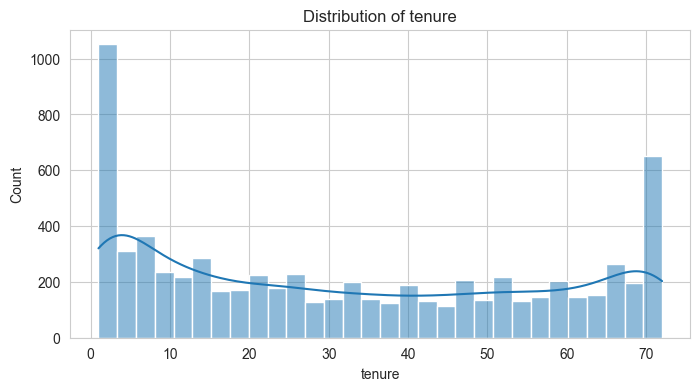

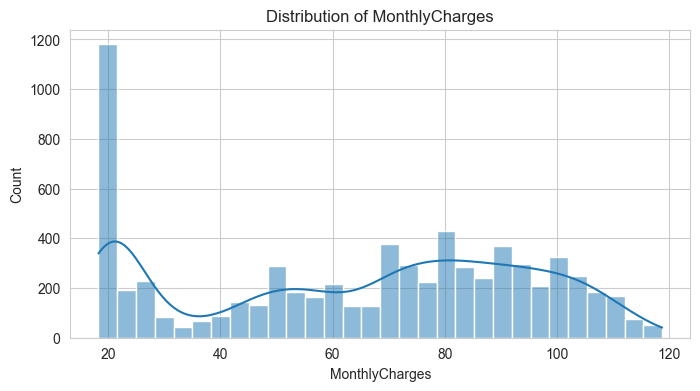

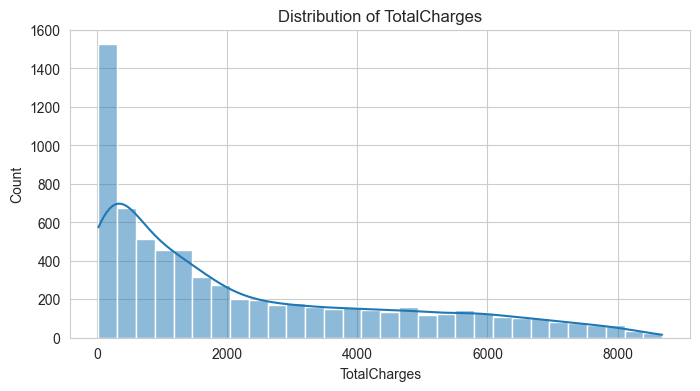

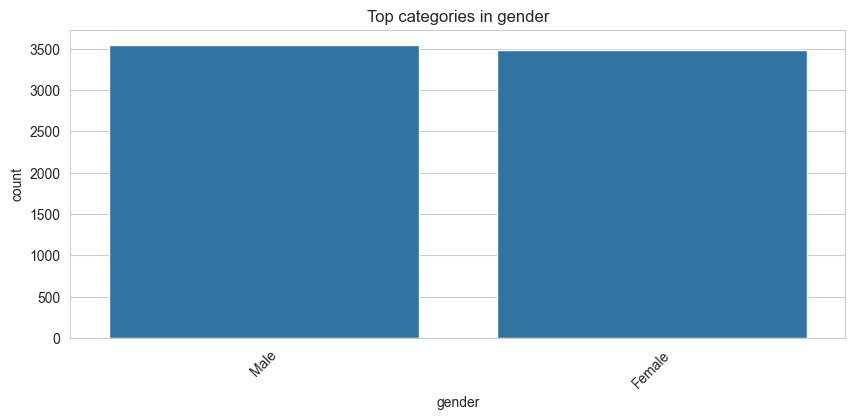

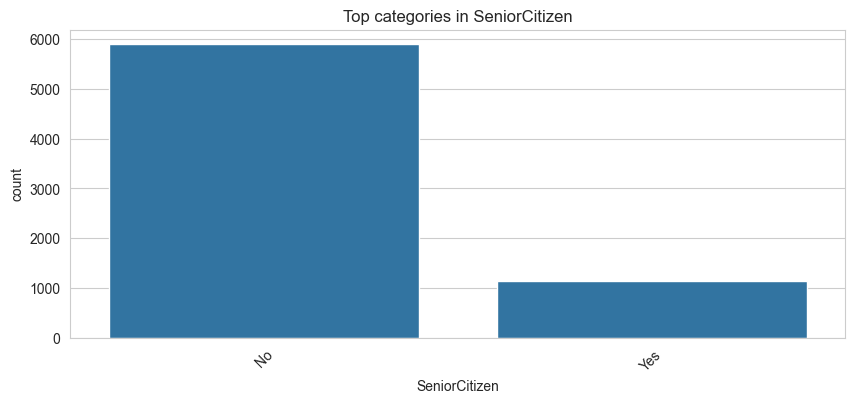

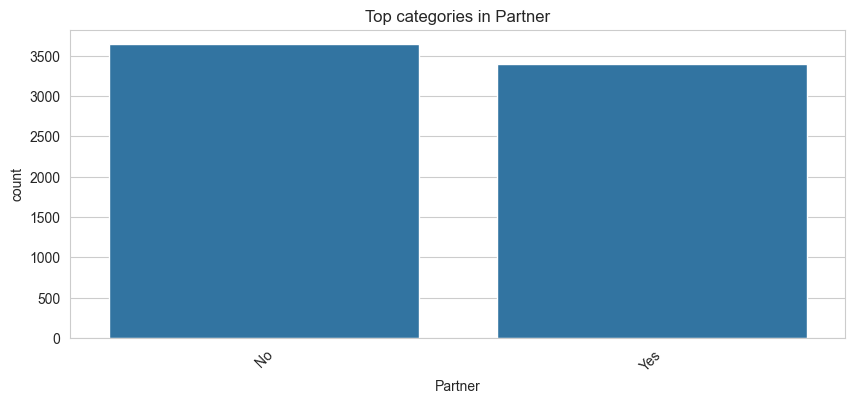

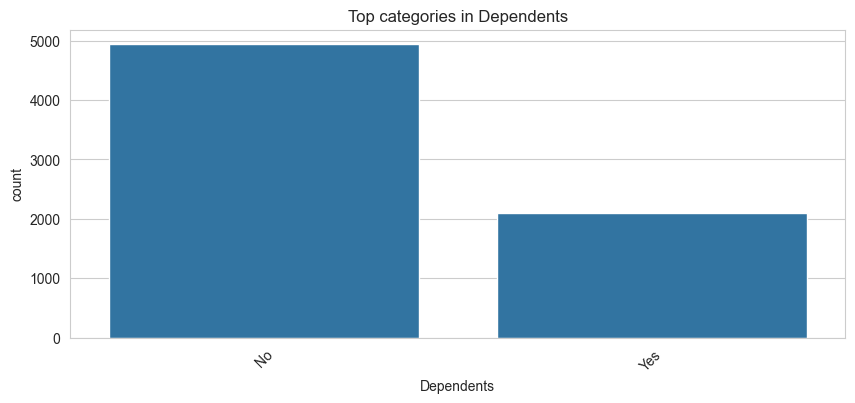

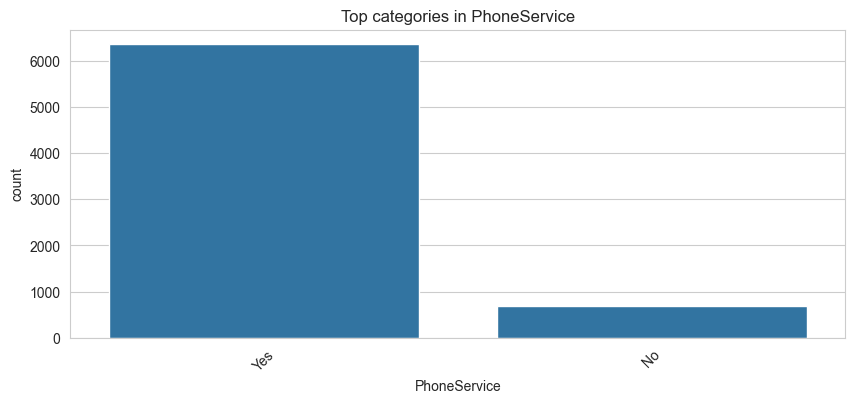

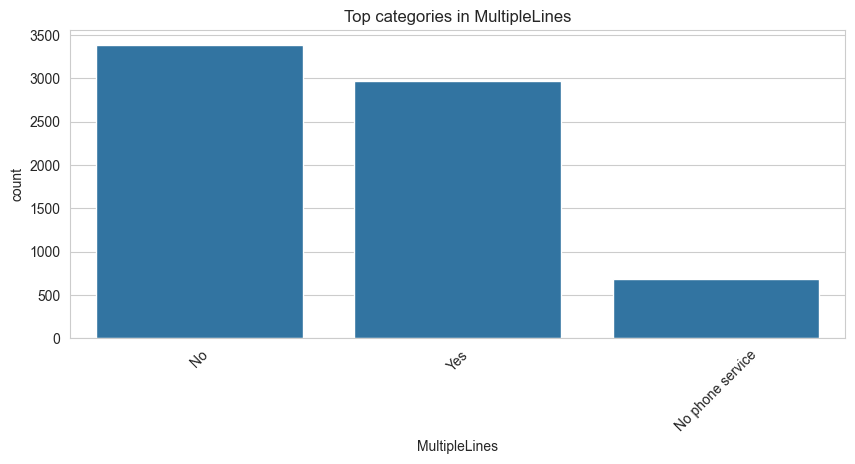

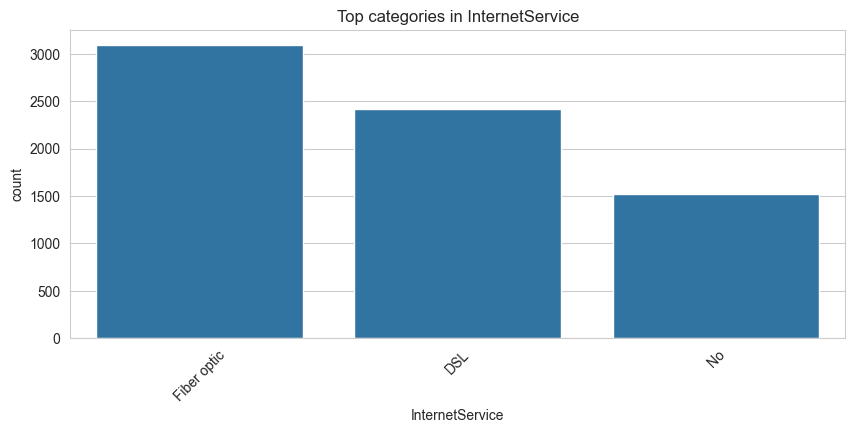

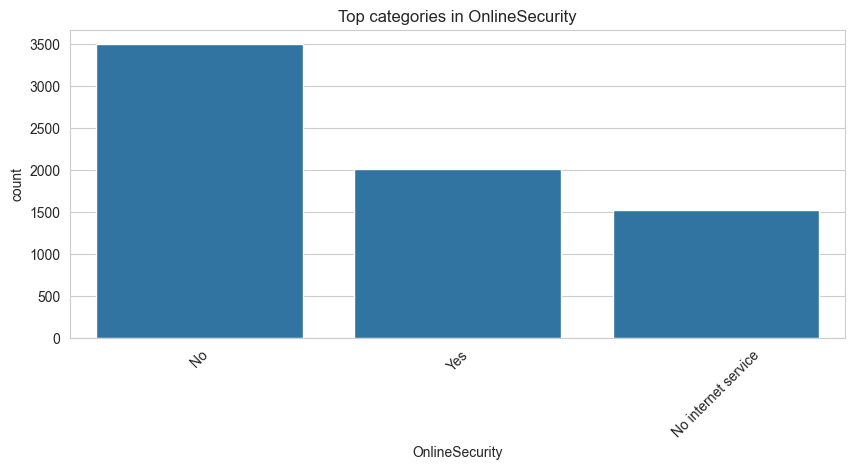

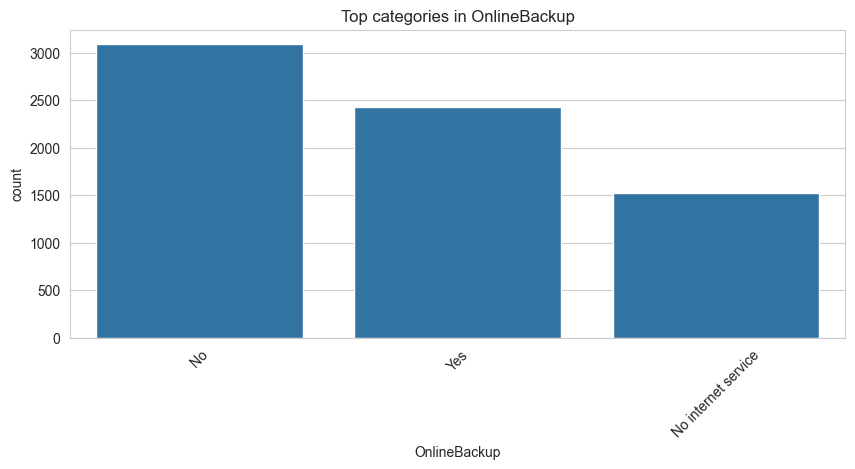

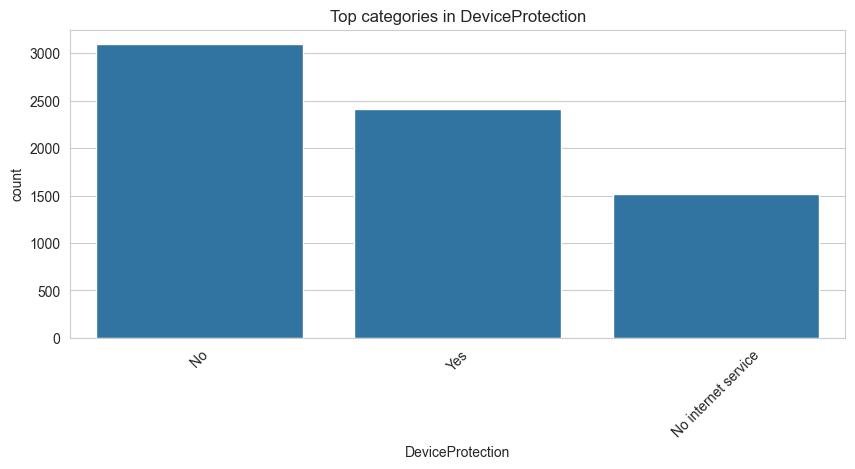

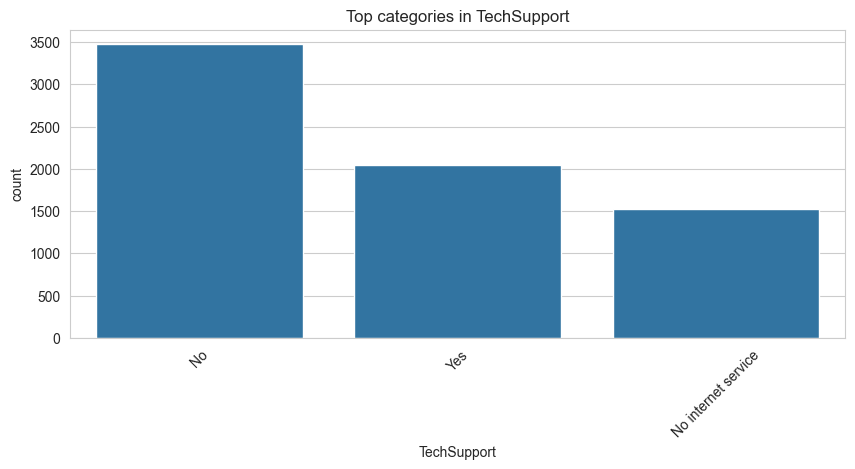

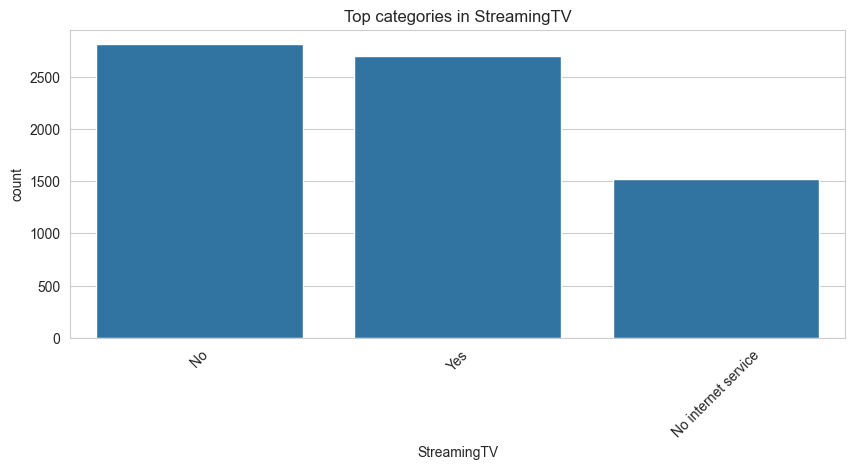

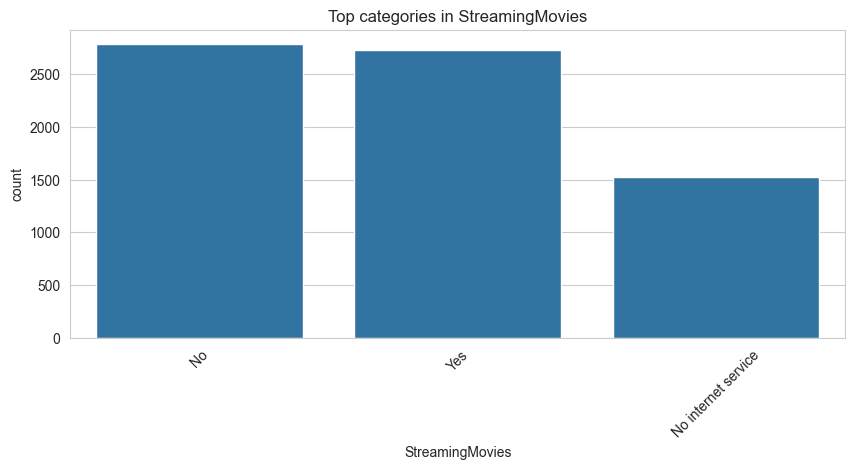

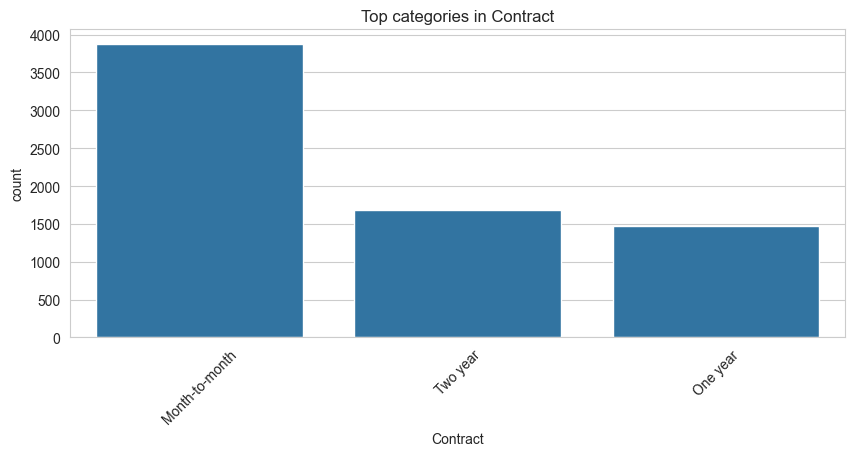

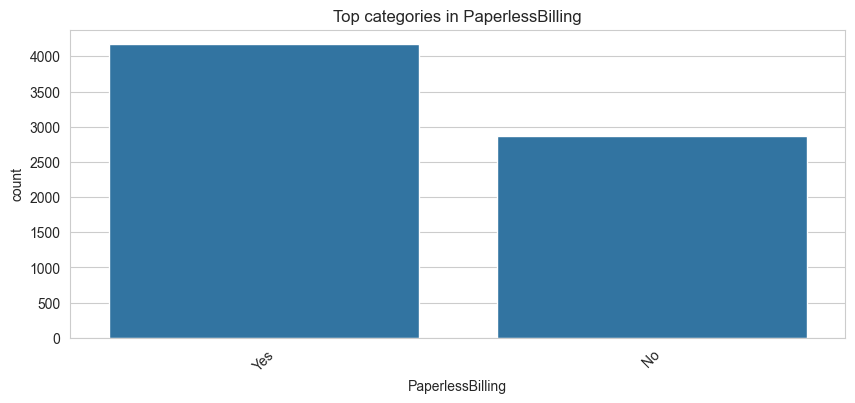

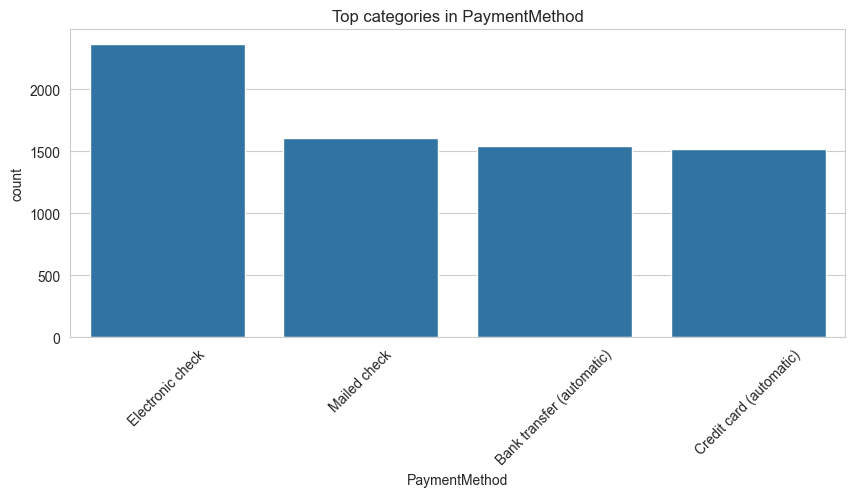

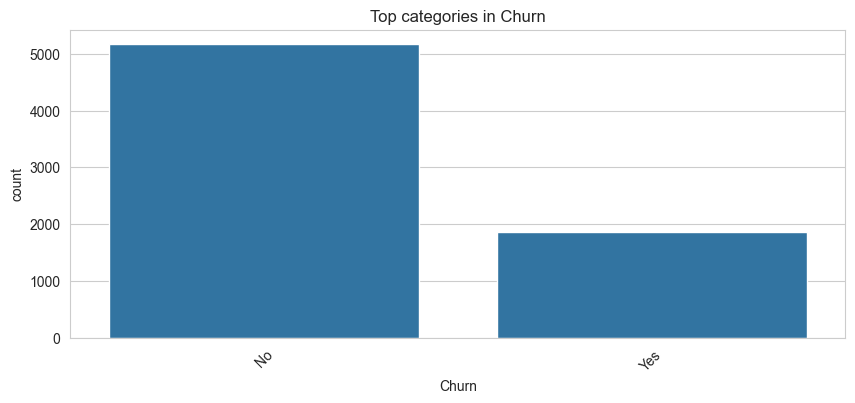

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

# List of numeric and categorical columns (based on your earlier classification)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()

# Numeric features distribution
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical features countplot (show top categories if too many)
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    top_categories = df[col].value_counts().nlargest(10).index
    sns.countplot(data=df[df[col].isin(top_categories)], x=col, order=top_categories)
    plt.title(f'Top categories in {col}')
    plt.xticks(rotation=45)
    plt.show()


In [30]:
### Step 2: Bivariate Analysis

In [31]:
#### Explore relationships between pairs of variables, especially numeric vs categorical or numeric vs numeric.

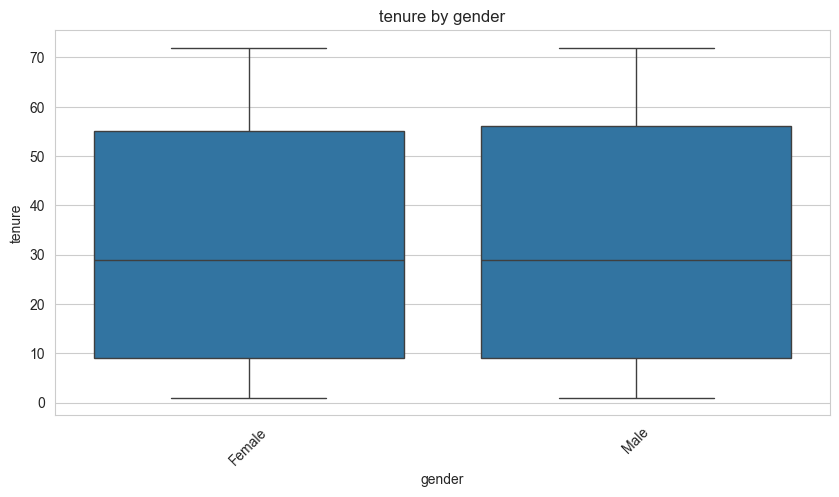

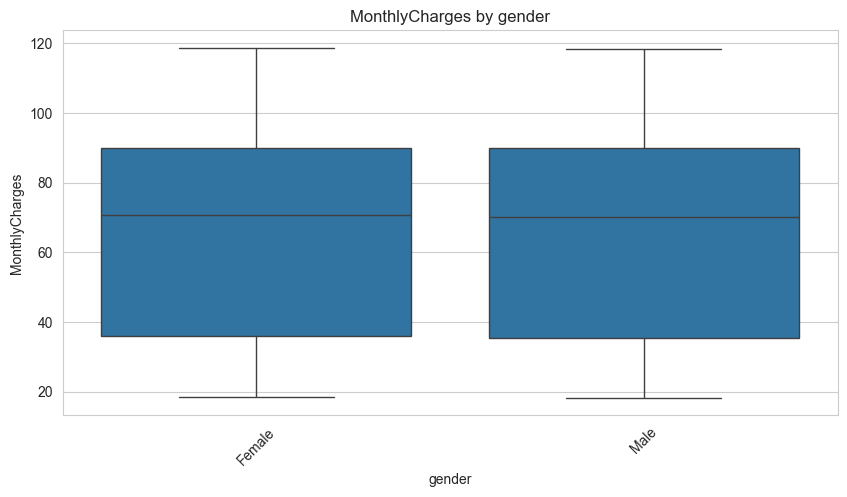

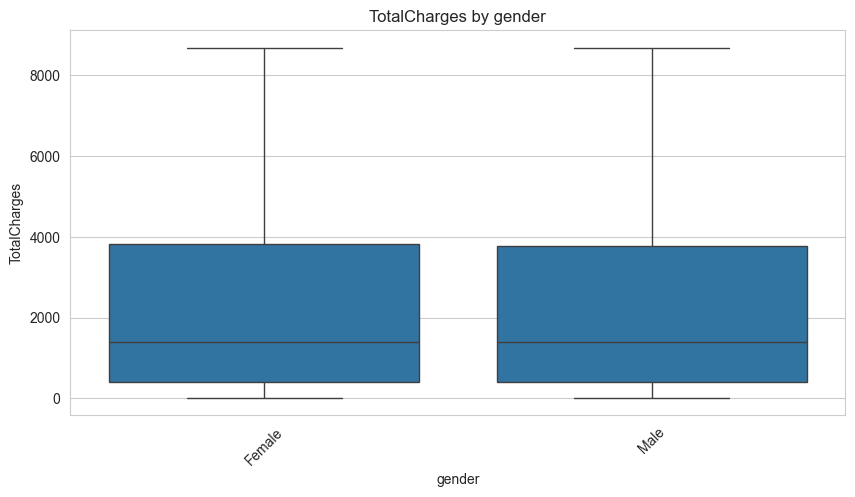

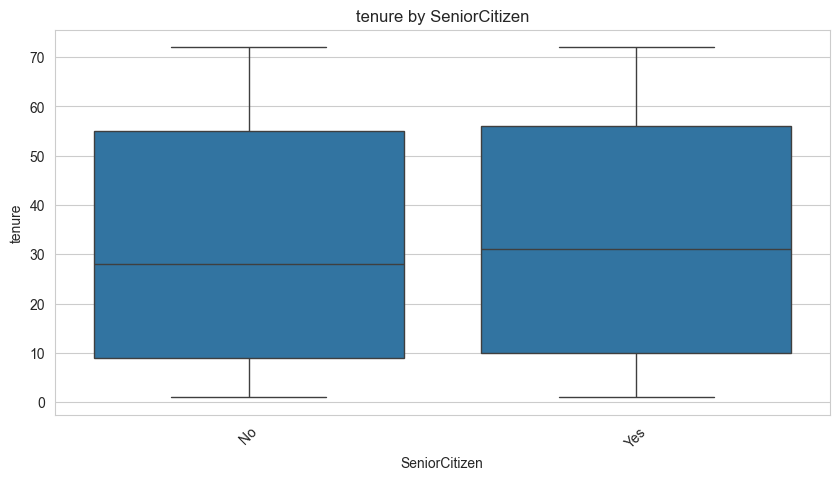

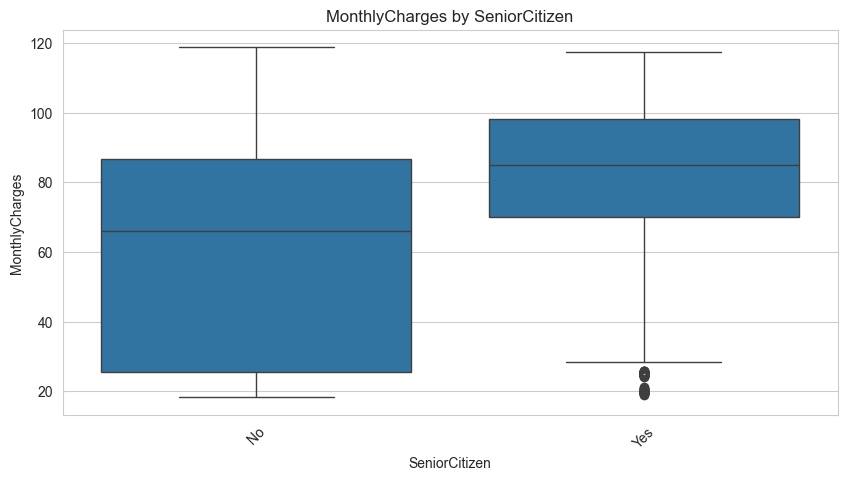

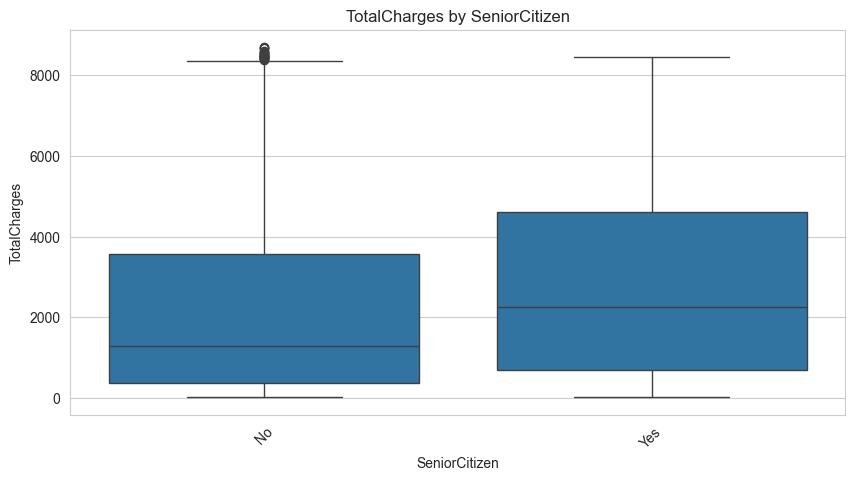

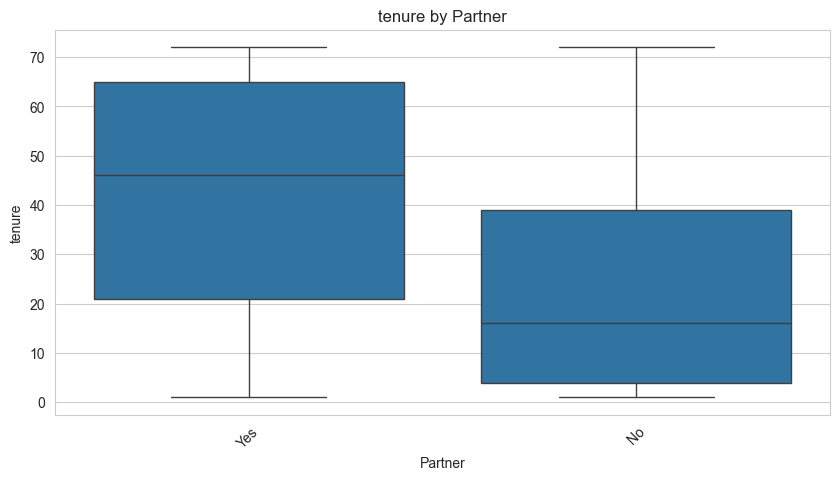

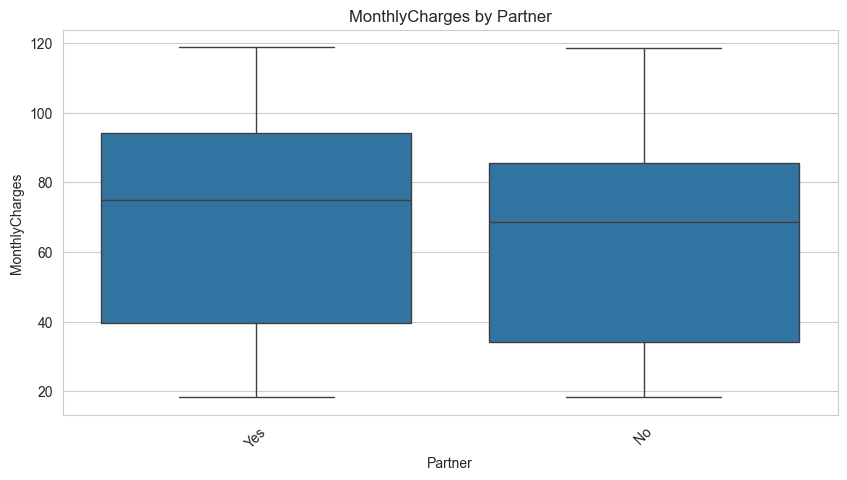

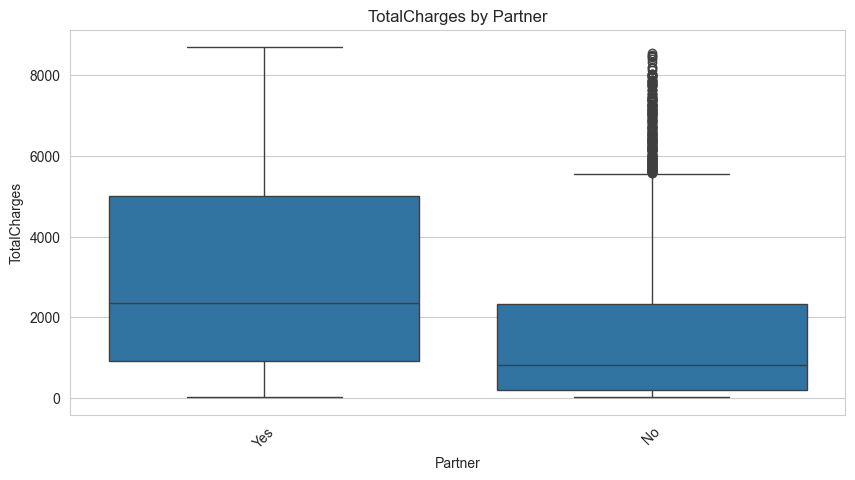

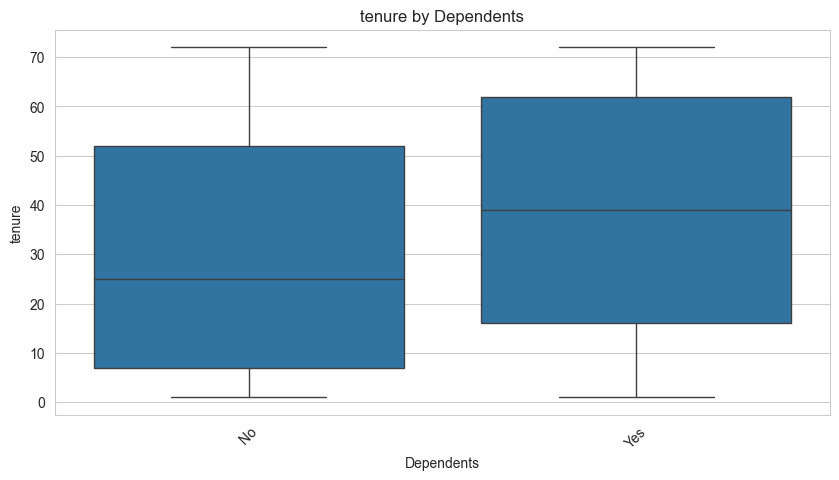

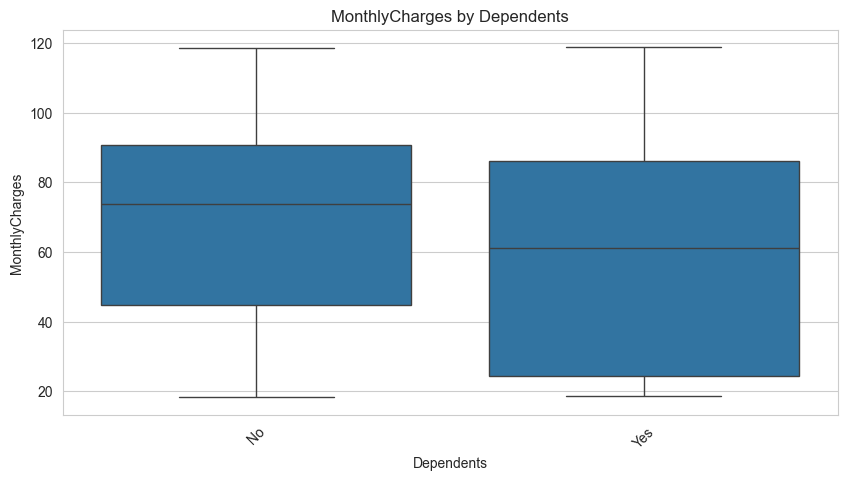

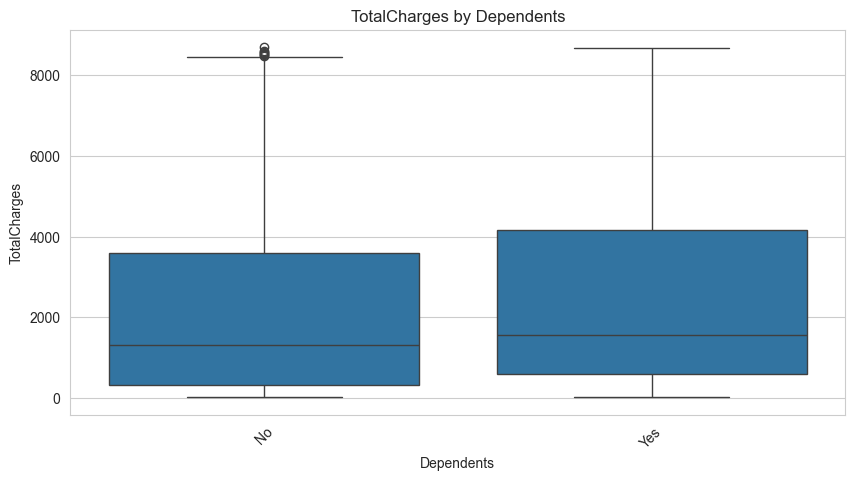

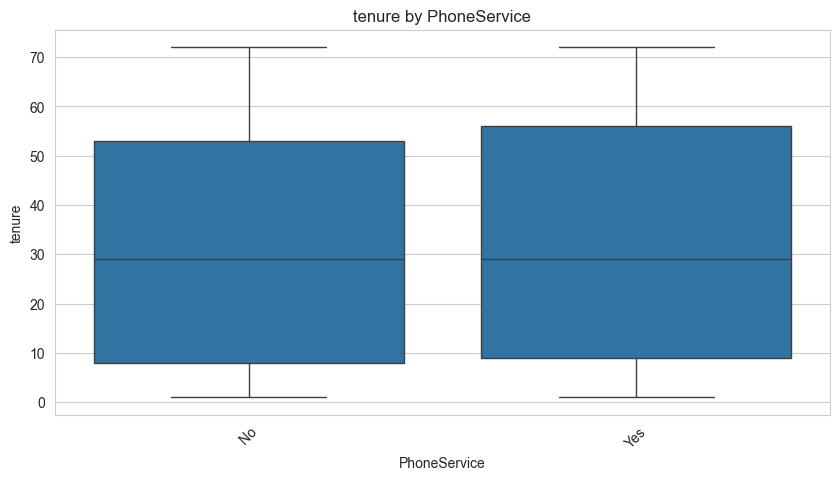

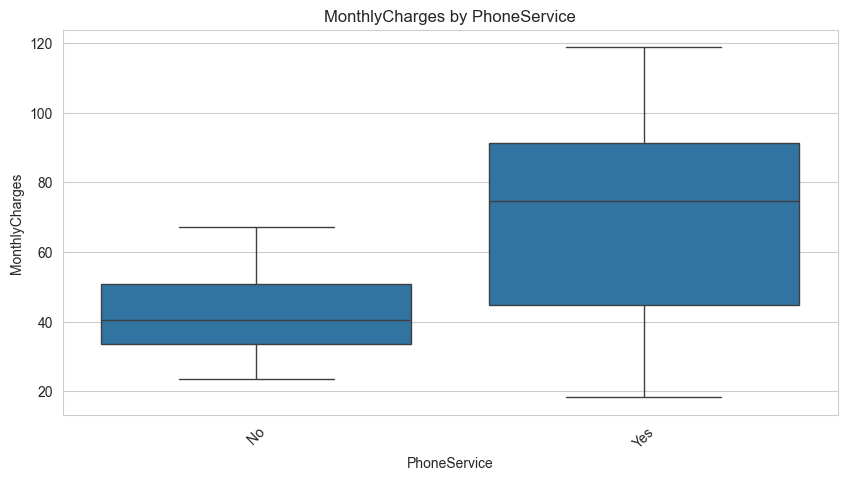

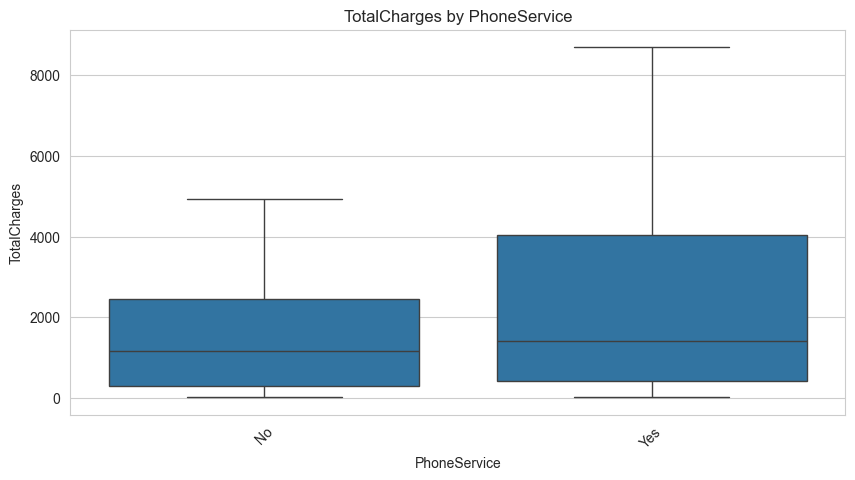

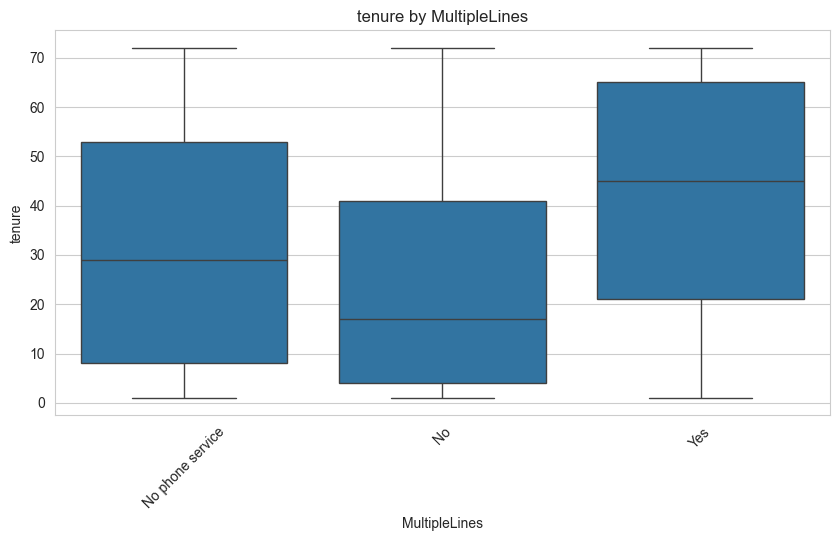

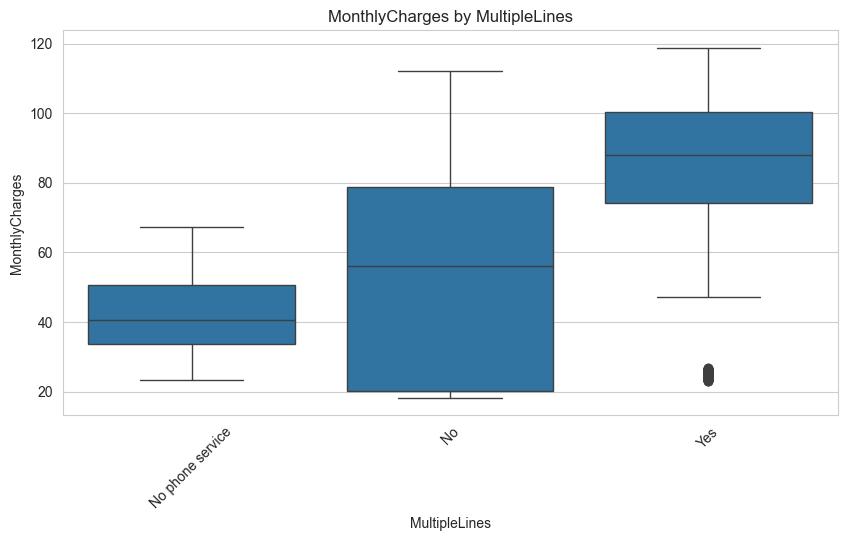

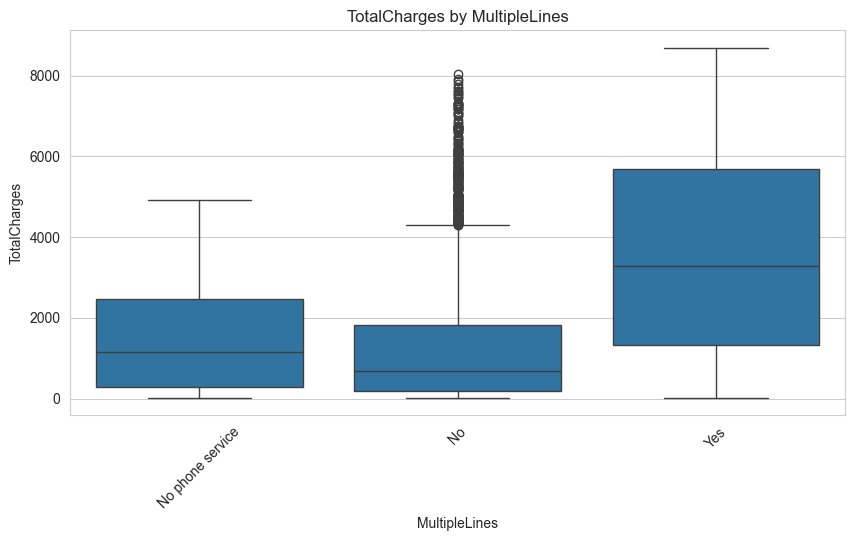

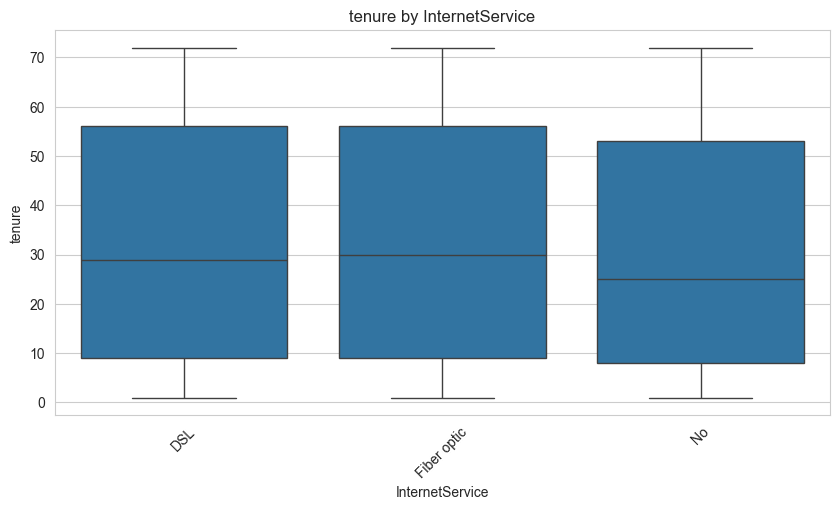

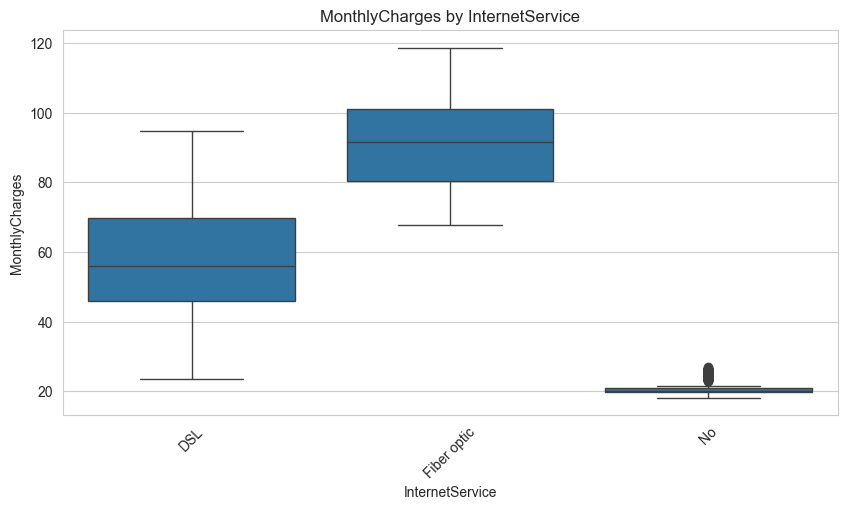

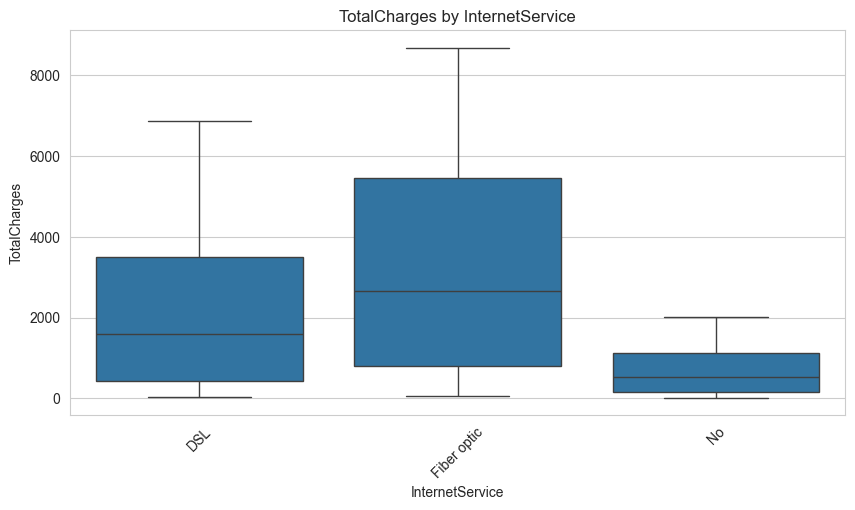

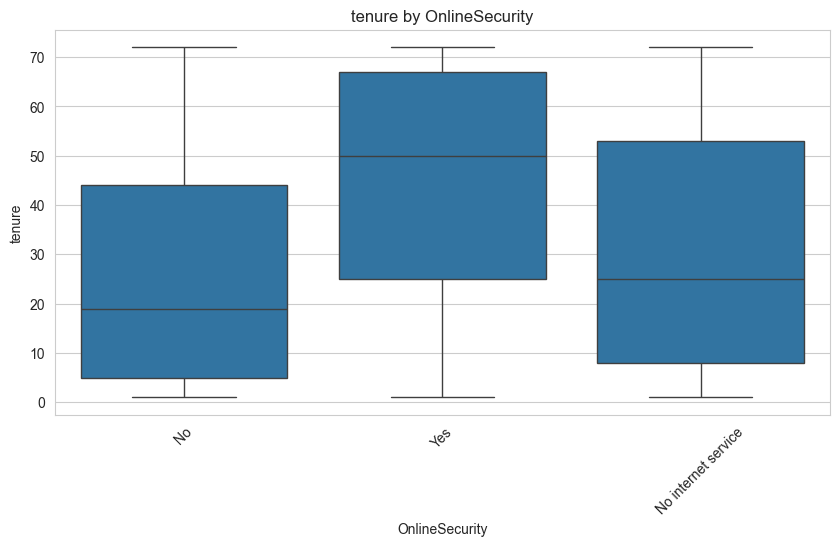

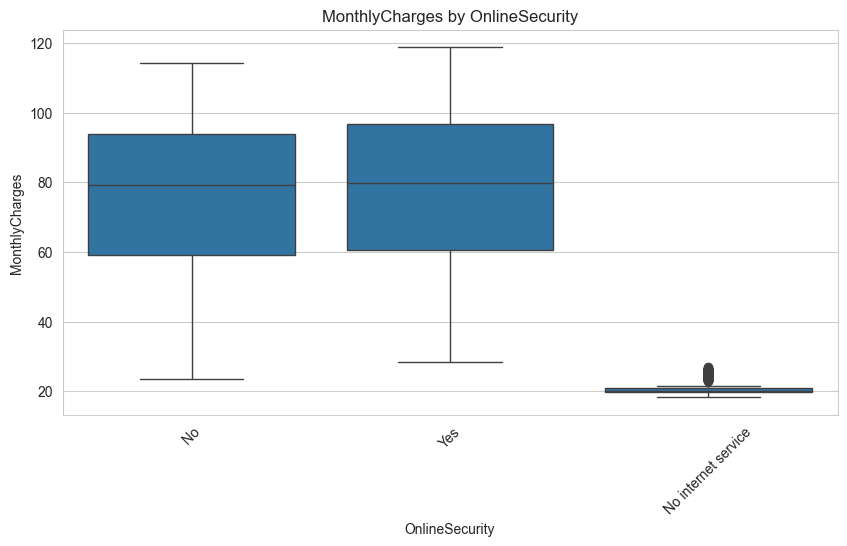

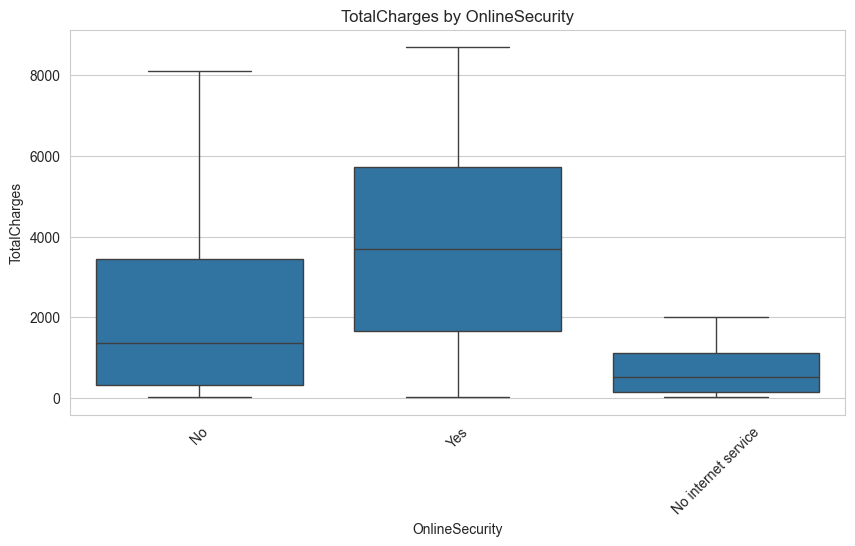

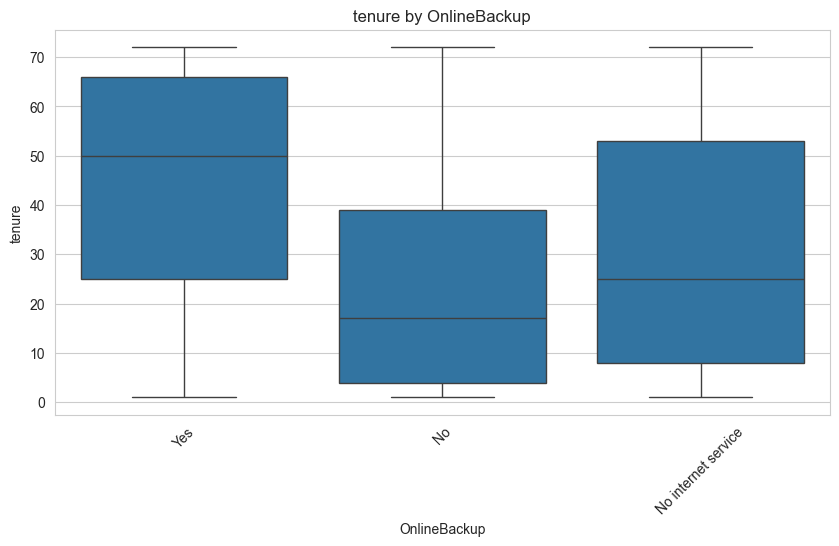

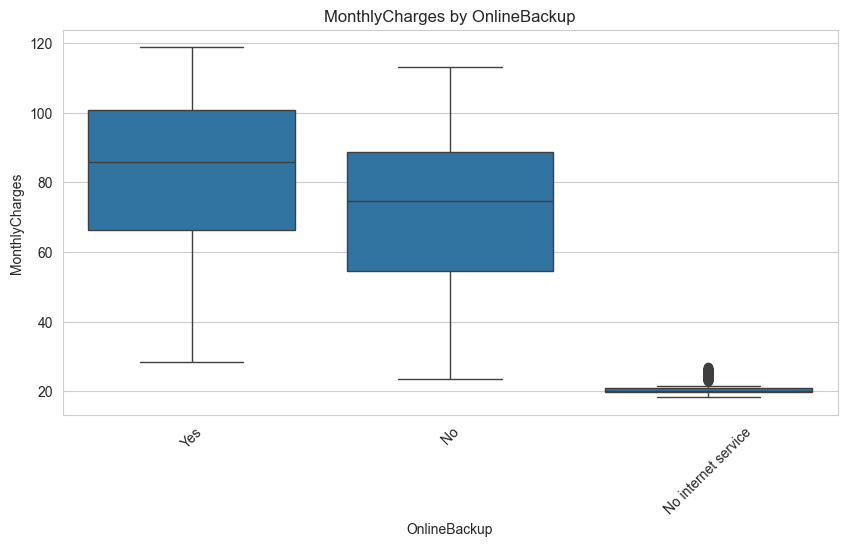

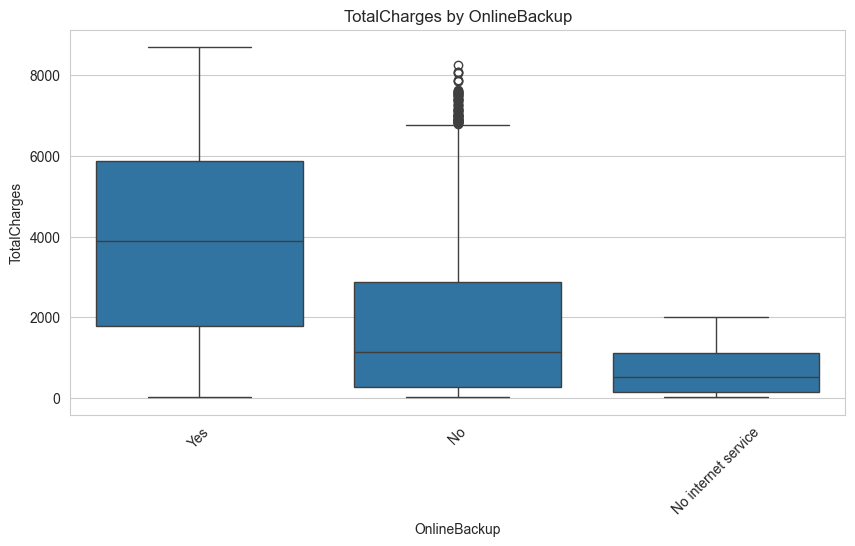

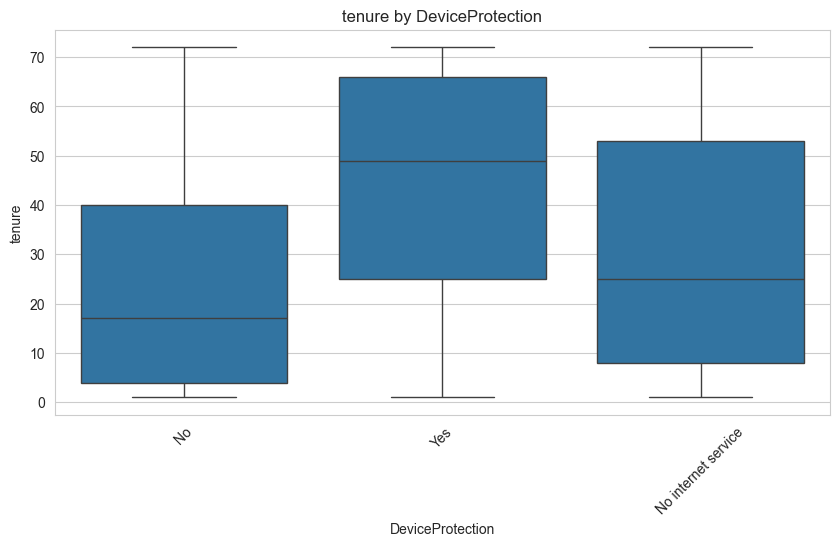

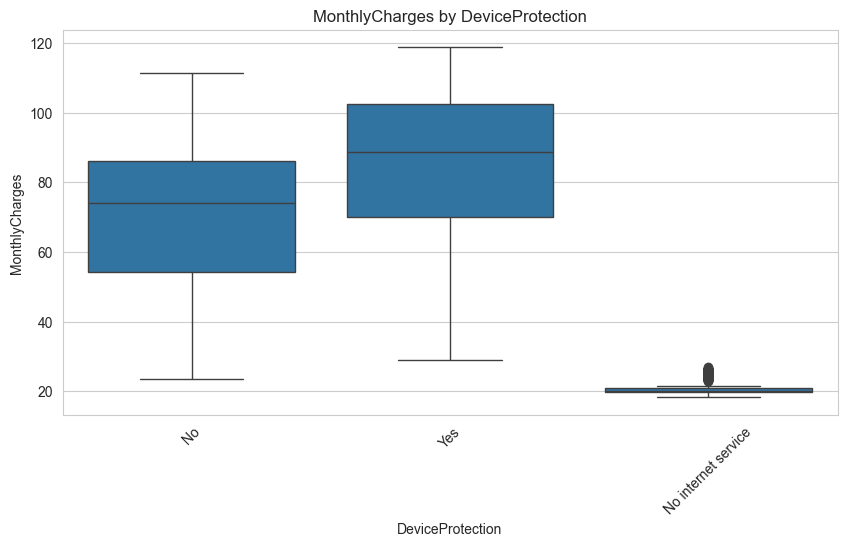

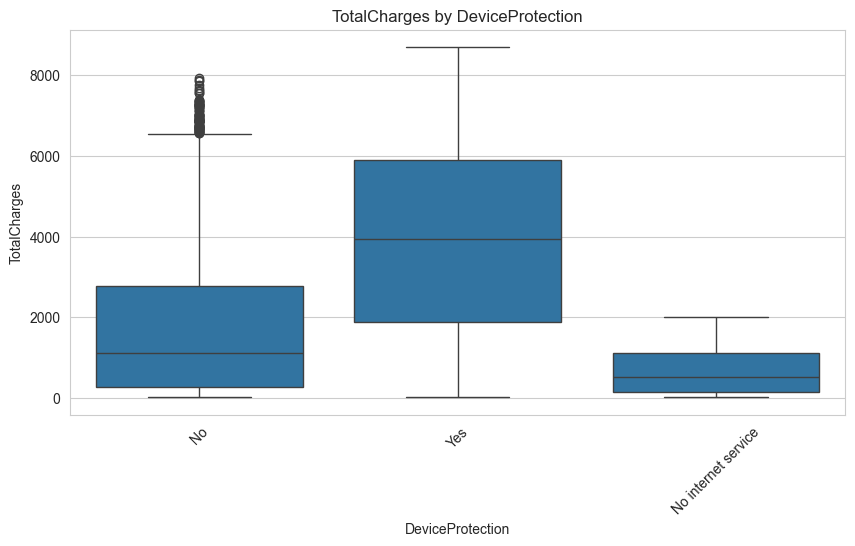

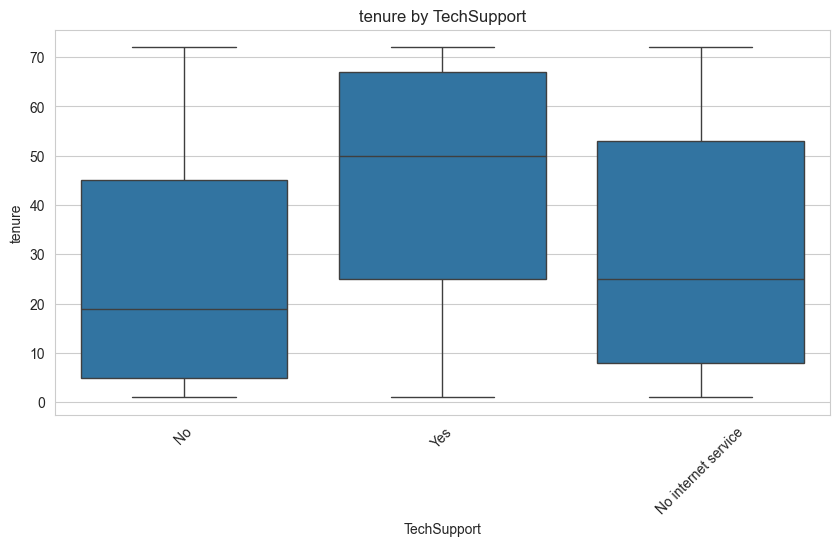

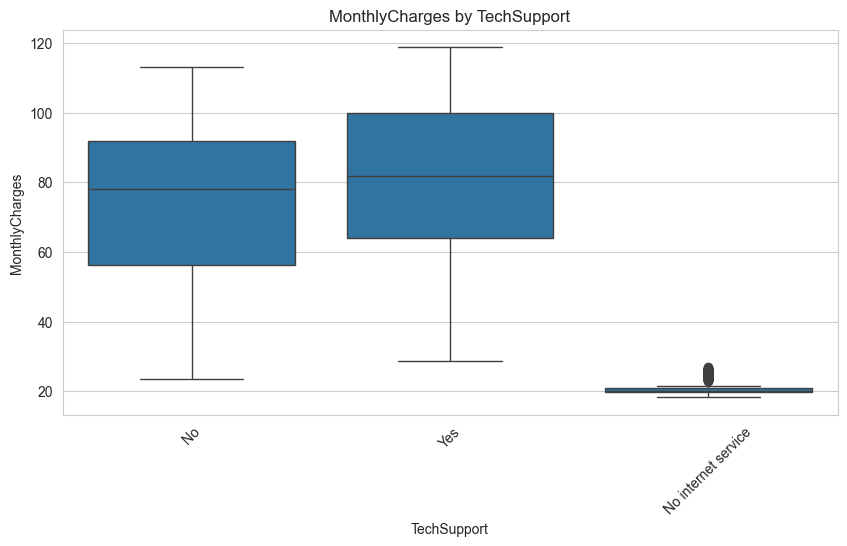

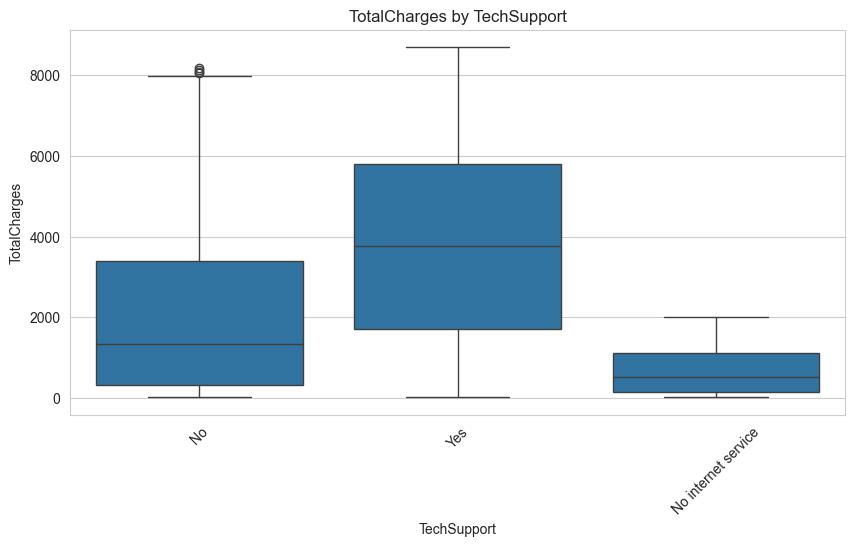

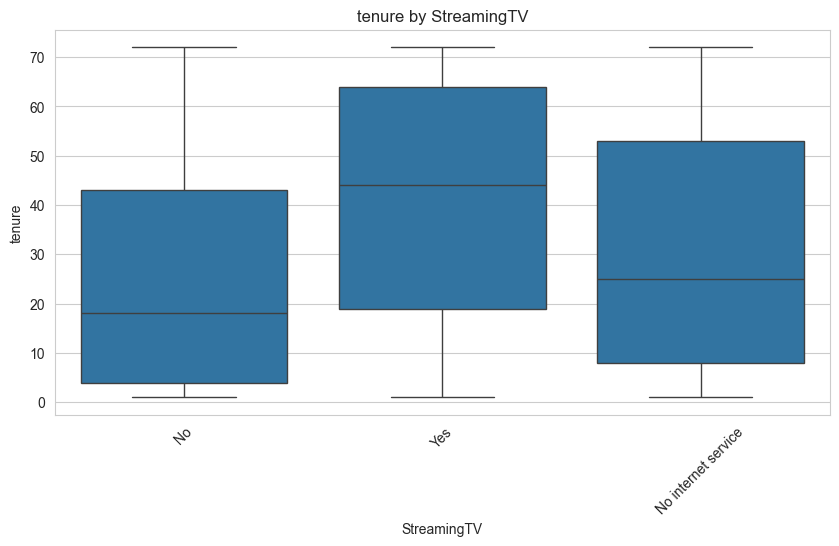

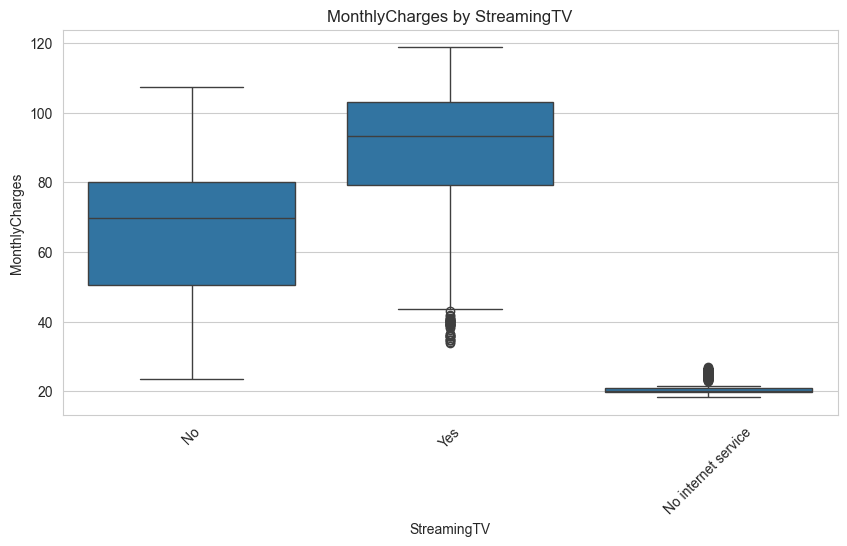

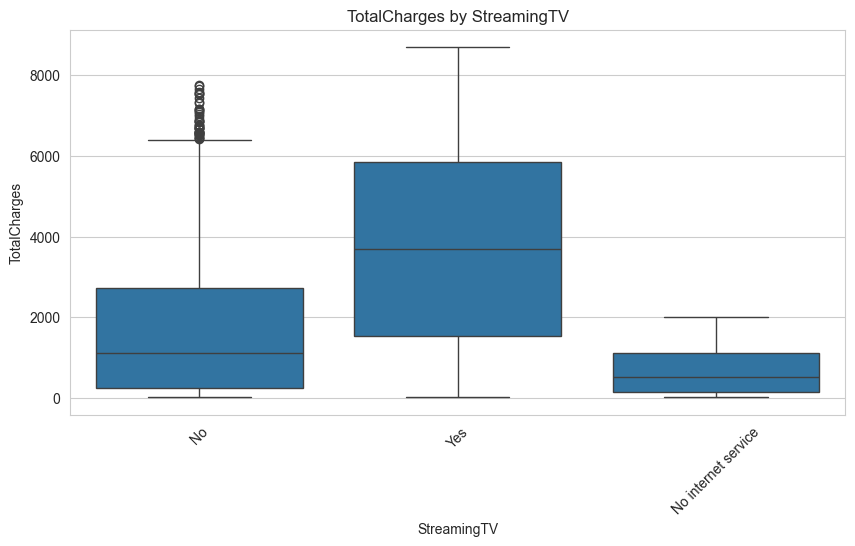

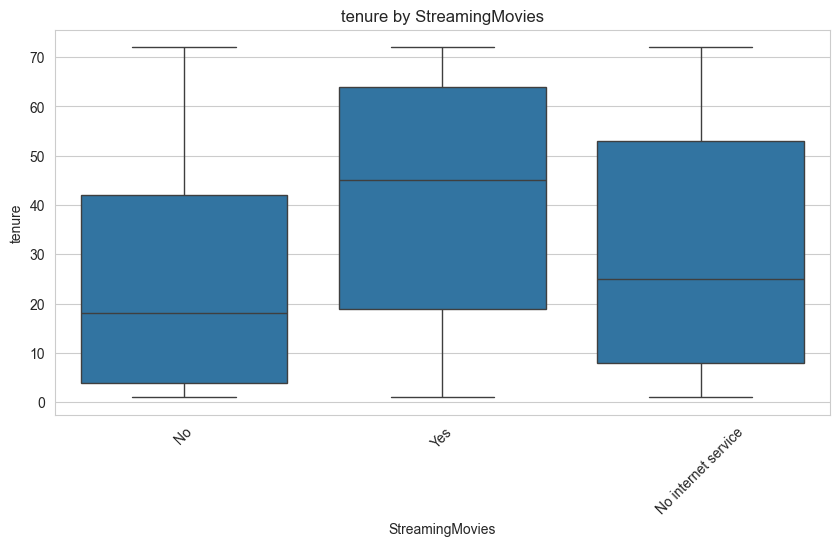

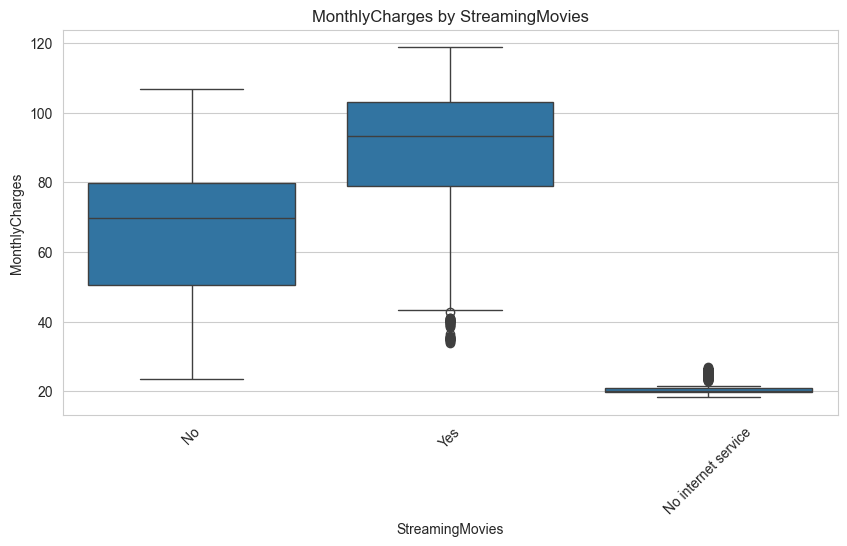

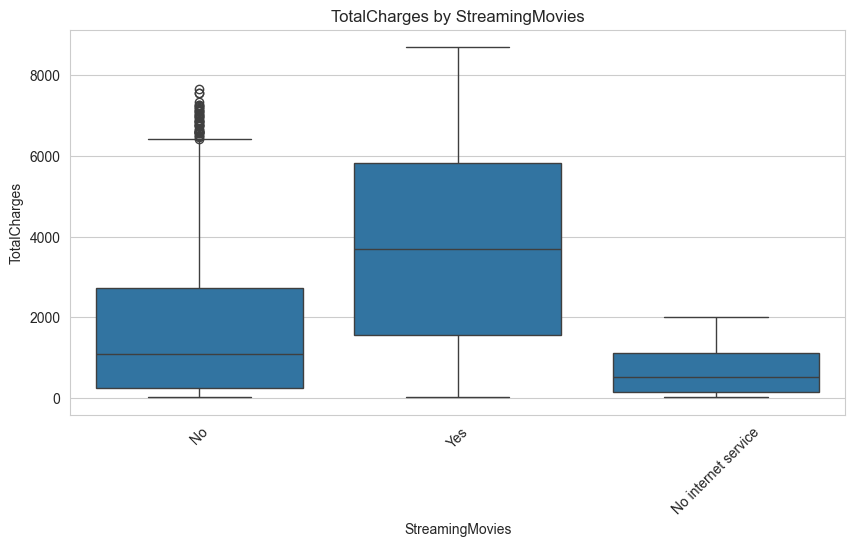

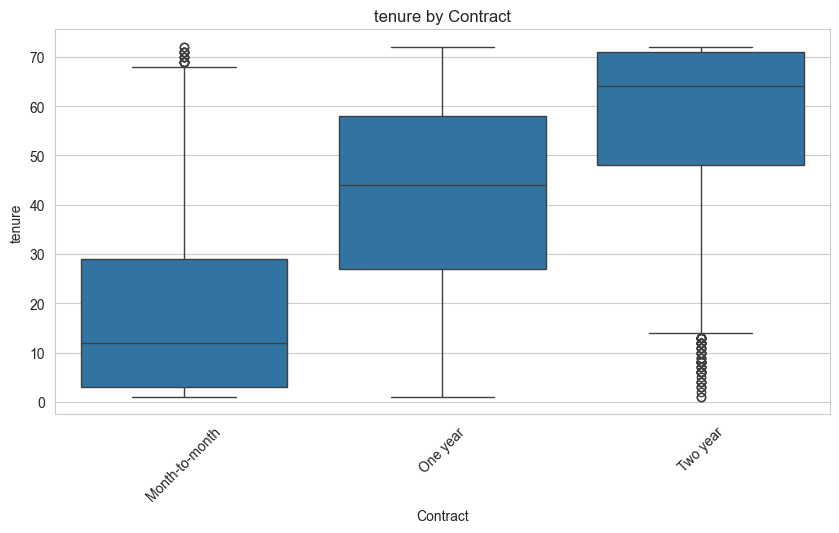

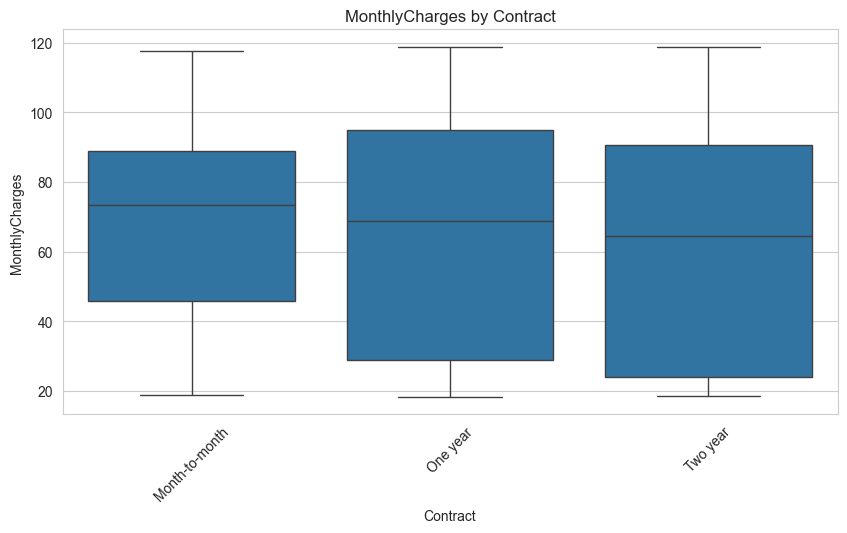

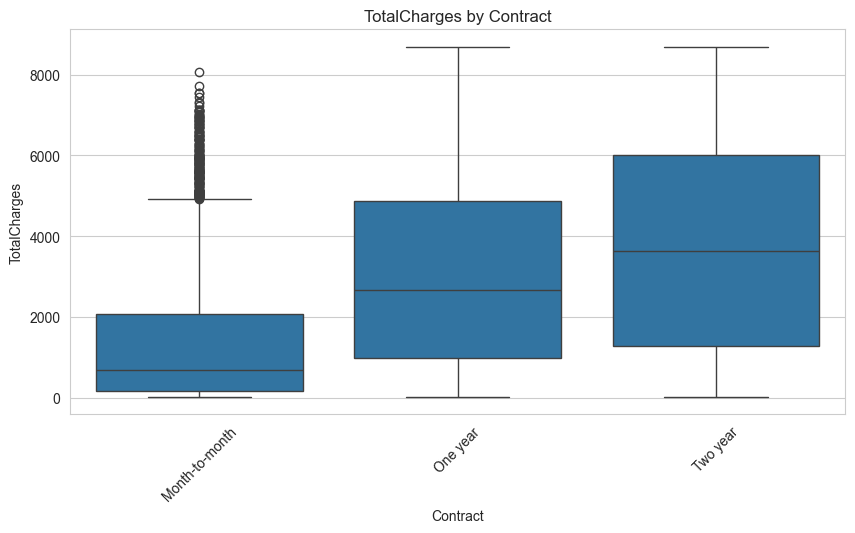

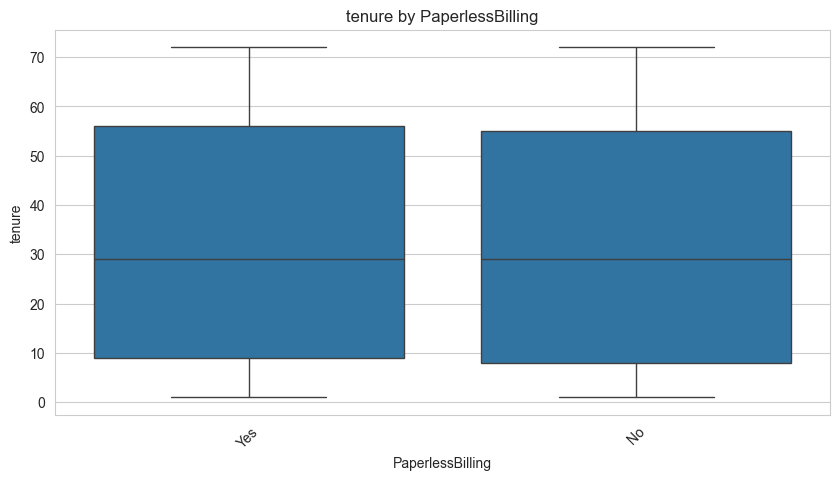

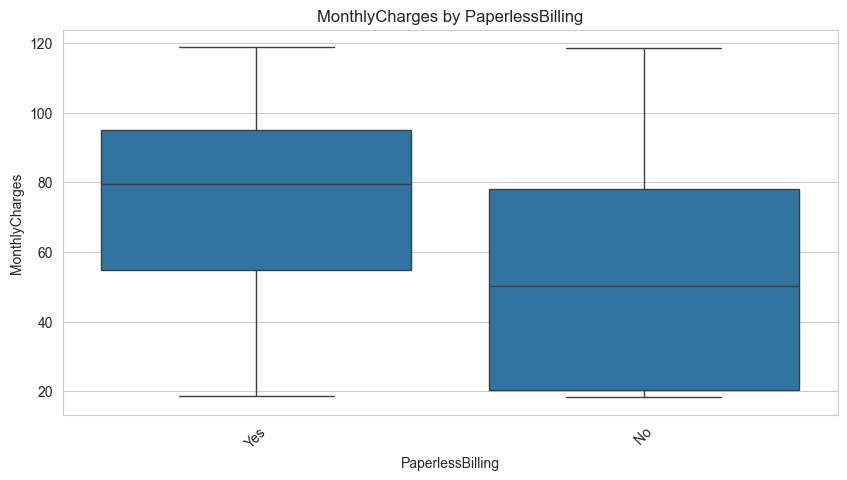

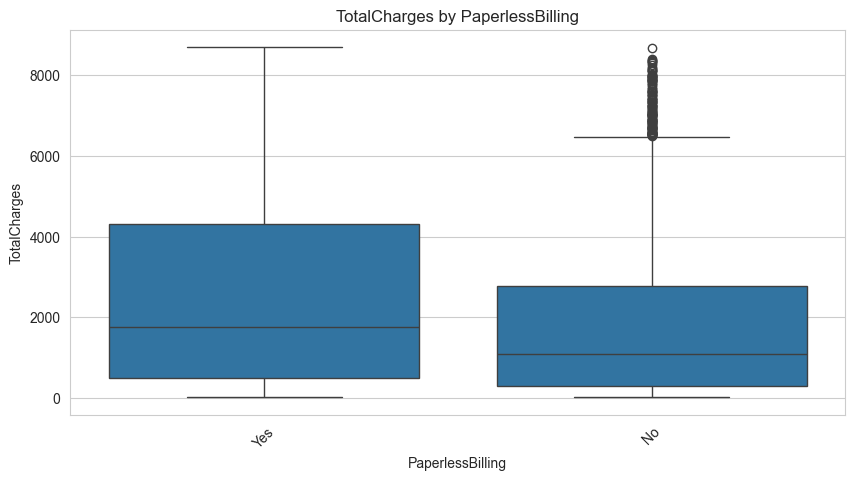

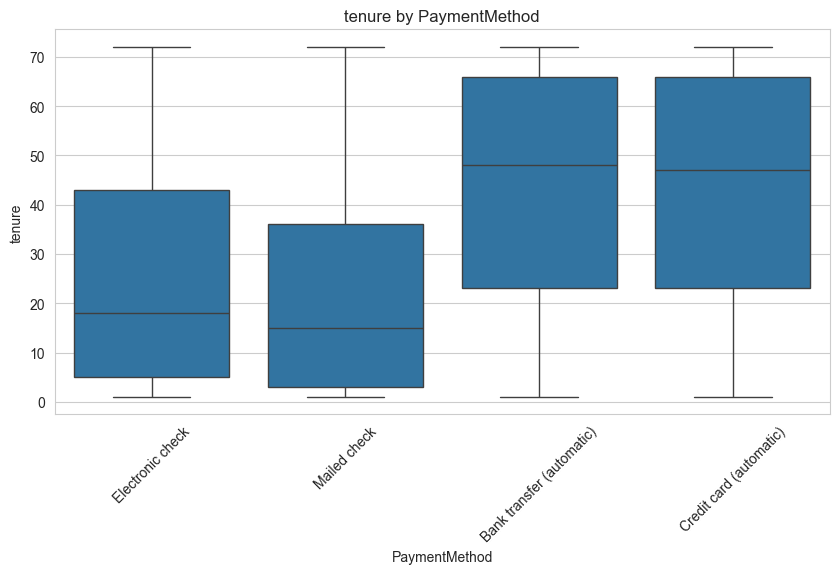

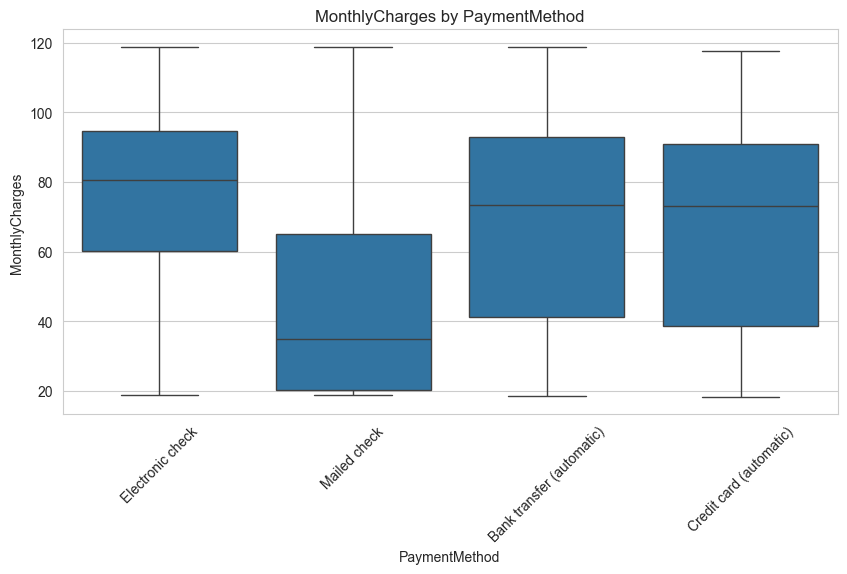

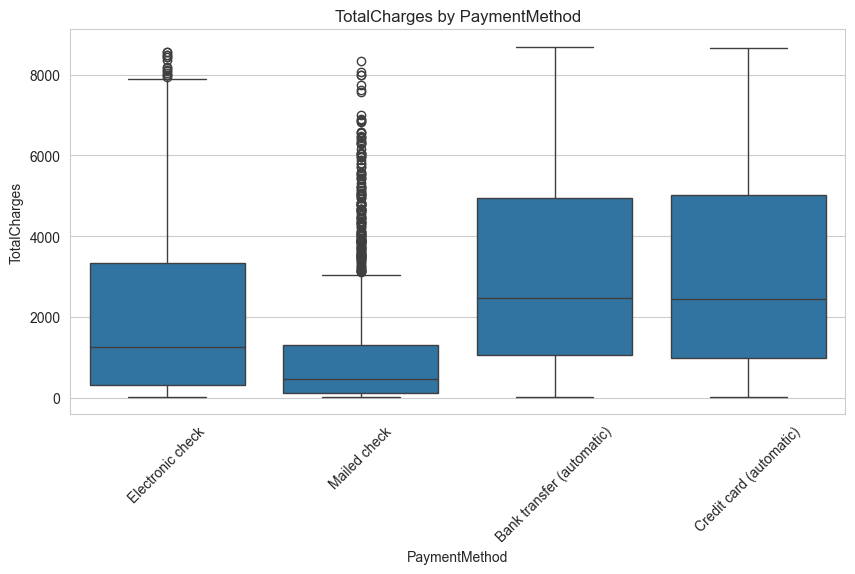

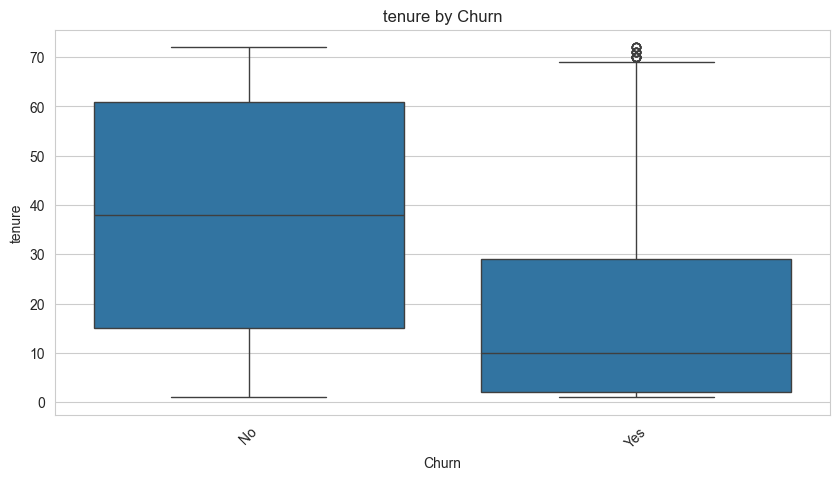

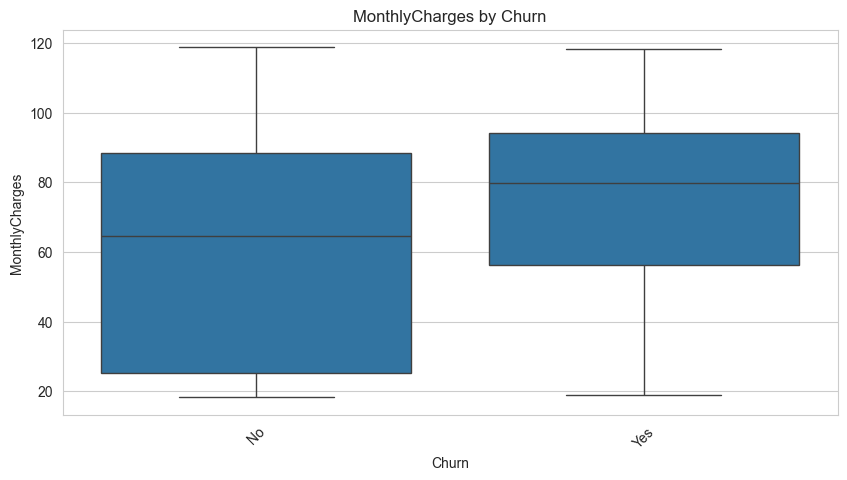

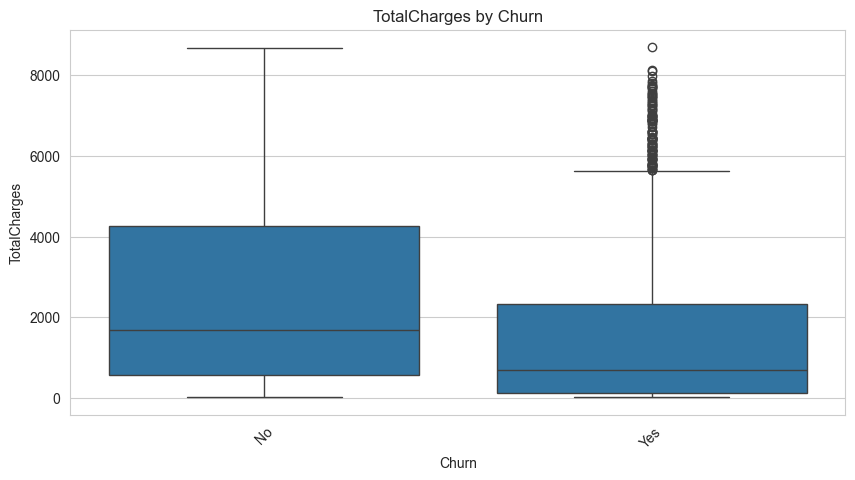

In [32]:
for cat_col in categorical_cols:
    for num_col in numeric_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[cat_col], y=df[num_col])
        plt.title(f'{num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()

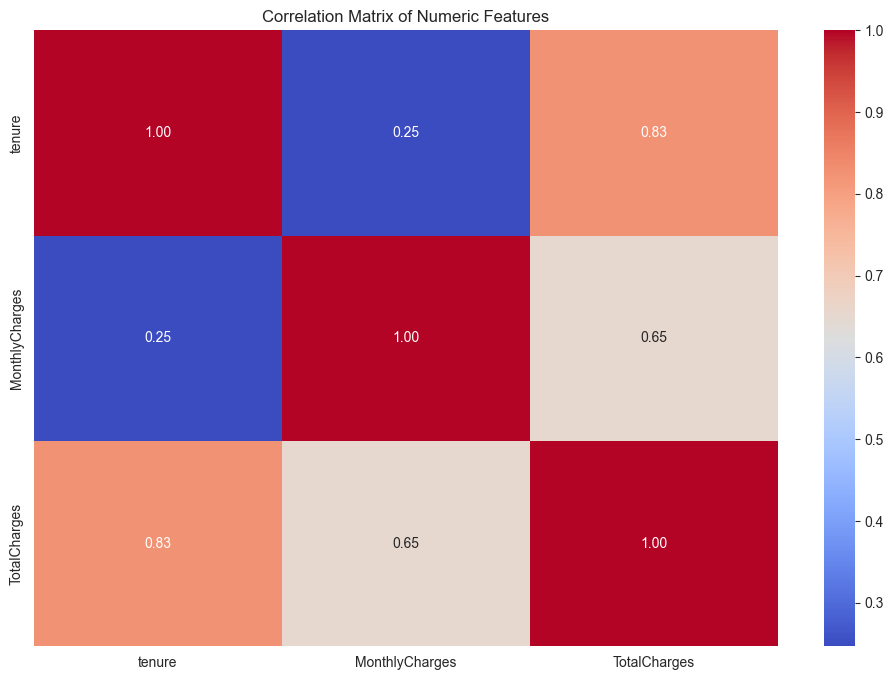

In [33]:
# Correlation matrix heatmap for numeric features 
plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [34]:
### Frequency counts for categorical columns

In [35]:
for col in categorical_cols:
    print(f"\nTop categories for {col}:")
    print(df[col].value_counts().head())


Top categories for gender:
gender
Male      3549
Female    3483
Name: count, dtype: int64

Top categories for SeniorCitizen:
SeniorCitizen
No     5890
Yes    1142
Name: count, dtype: int64

Top categories for Partner:
Partner
No     3639
Yes    3393
Name: count, dtype: int64

Top categories for Dependents:
Dependents
No     4933
Yes    2099
Name: count, dtype: int64

Top categories for PhoneService:
PhoneService
Yes    6352
No      680
Name: count, dtype: int64

Top categories for MultipleLines:
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

Top categories for InternetService:
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

Top categories for OnlineSecurity:
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

Top categories for OnlineBackup:
OnlineBackup
No                     3087
Yes     

In [36]:
### Outlier Detection

In [37]:
### Beyond boxplots, consider outlier counts or visualizing using violin plots or scatter plots for key numeric columns.

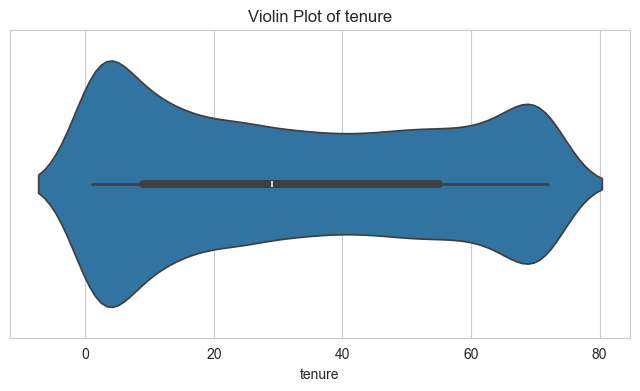

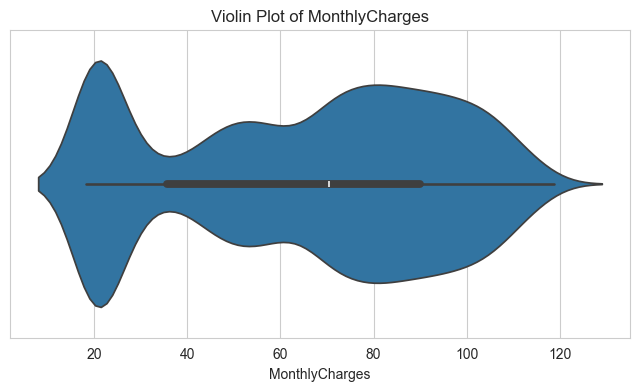

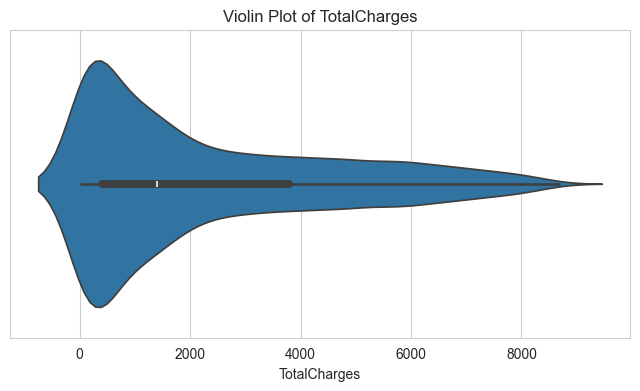

In [38]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=df[col])
    plt.title(f'Violin Plot of {col}')
    plt.show()

In [39]:
### Distribution Checks for Normality

In [40]:
#### Check skewness and kurtosis to decide if transformations (log, sqrt) might be needed later.

In [41]:
from scipy.stats import skew, kurtosis

for col in numeric_cols:
    print(f"{col}: Skewness = {skew(df[col])}, Kurtosis = {kurtosis(df[col])}")

tenure: Skewness = 0.23768011839839964, Kurtosis = -1.3876891061975711
MonthlyCharges: Skewness = -0.22205554798978874, Kurtosis = -1.2561165516571853
TotalCharges: Skewness = 0.9614373590490075, Kurtosis = -0.23248709758655073


In [42]:
### Pairwise Relationships

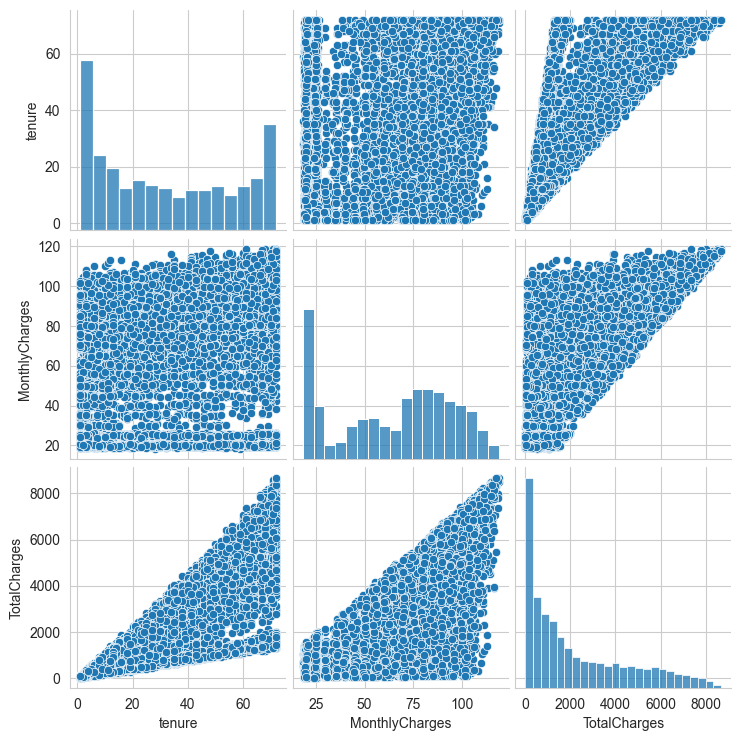

In [43]:
sns.pairplot(df[numeric_cols])
plt.show()

In [44]:
### Missing Value Analysis

In [45]:
df.isna().sum()
df.eq(" ").sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

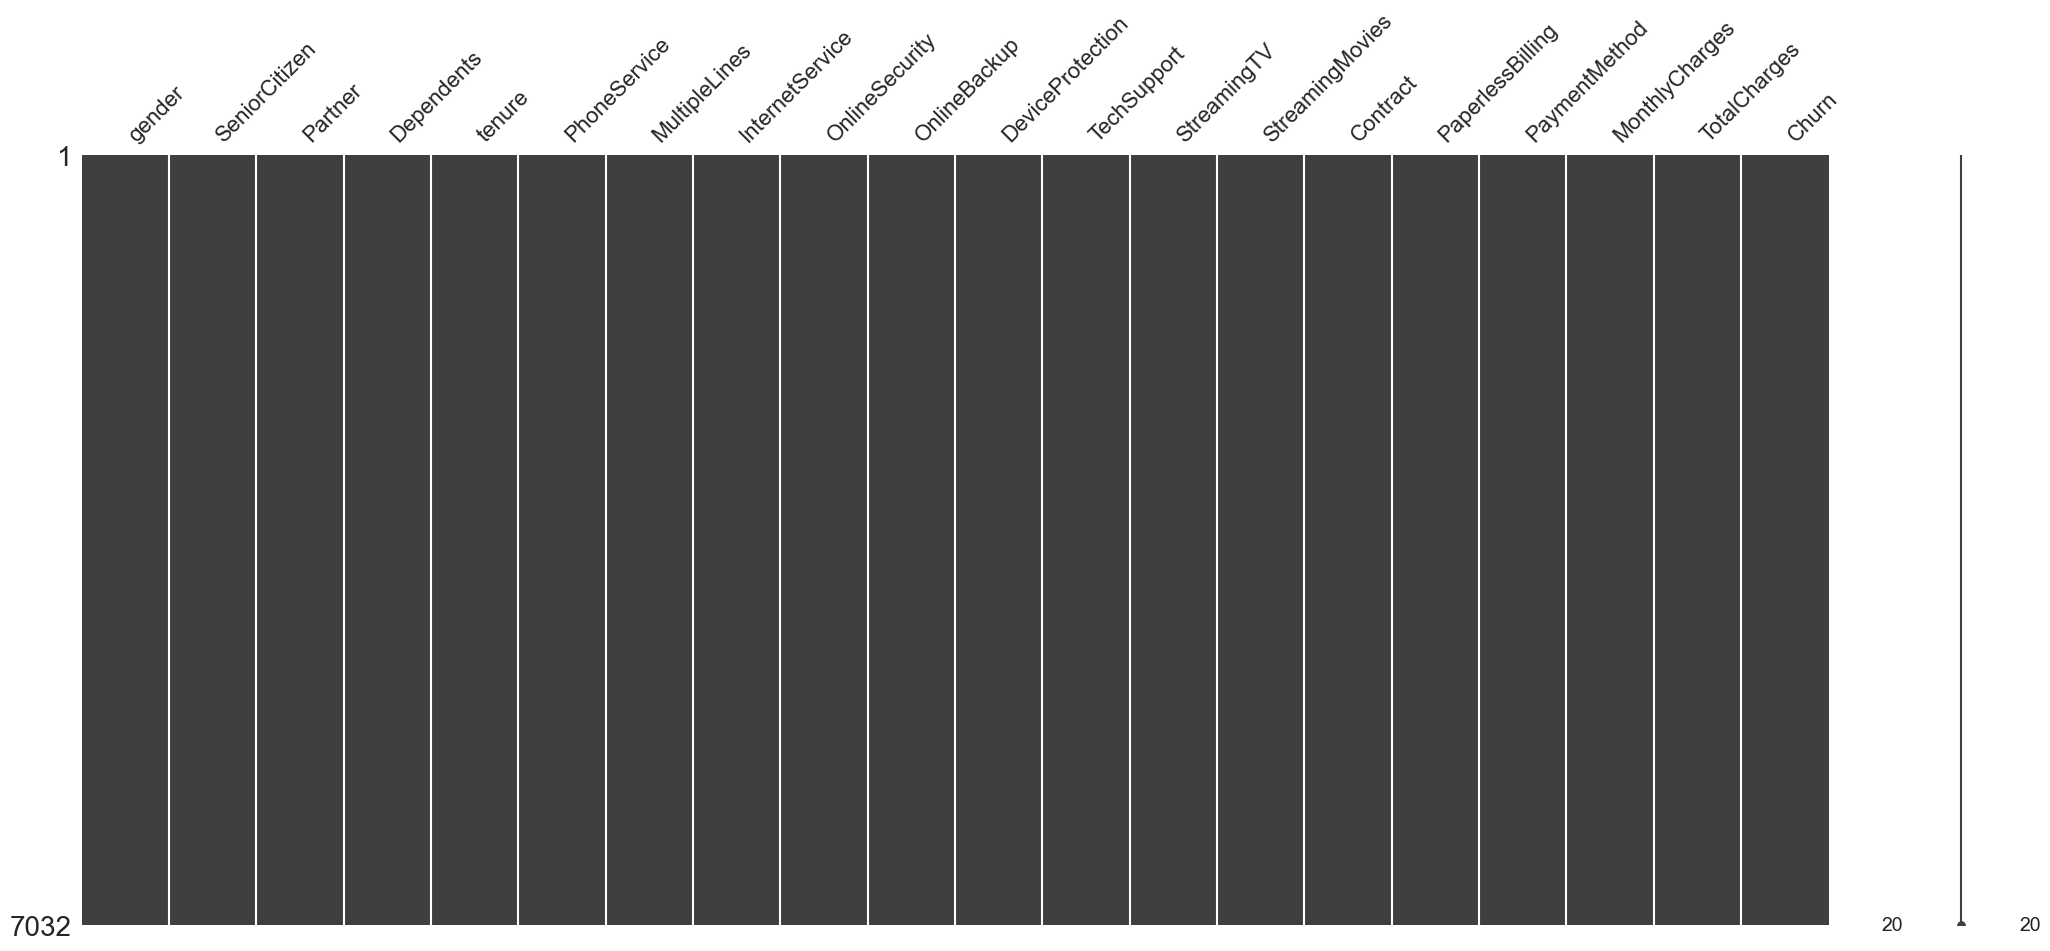

In [46]:
import missingno as msno
msno.matrix(df)

In [47]:
### Target Variable Balance Check
#### For churn prediction, see if Churn is imbalanced.

Text(0.5, 1.0, 'Churn Distribution')

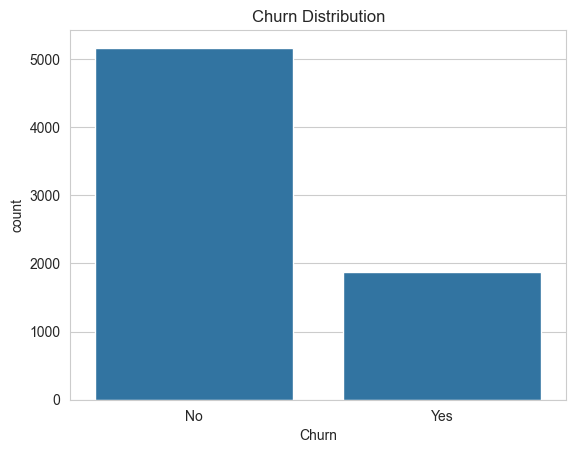

In [48]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')

In [49]:
### Multicollinearity Check for Numeric Features
#### Detect highly correlated variables (VIF score > 10).

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


          feature       VIF
0          tenure  6.332432
1  MonthlyCharges  3.361075
2    TotalCharges  8.079181


In [51]:
### Chi-Square Tests for Categorical vs Target

####Test statistical significance between categorical features and Churn.

In [52]:
import pandas as pd
from scipy.stats import chi2_contingency

# List to store results
chi2_results = []

# Loop through categorical columns (excluding target)
for col in df.select_dtypes(include='object').columns:
    if col != 'Churn':
        ct = pd.crosstab(df[col], df['Churn'])
        chi2, p, dof, expected = chi2_contingency(ct)
        chi2_results.append({
            'Feature': col,
            'Chi2 Statistic': round(chi2, 3),
            'p-value': round(p, 4),
            'Degrees of Freedom': dof,
            'Significant?': 'Yes' if p < 0.05 else 'No'
        })

# Convert to DataFrame for tabular format
chi2_df = pd.DataFrame(chi2_results)

# Display table
print(chi2_df)


             Feature  Chi2 Statistic  p-value  Degrees of Freedom Significant?
0             gender           0.475   0.4905                   1           No
1      SeniorCitizen         158.441   0.0000                   1          Yes
2            Partner         157.503   0.0000                   1          Yes
3         Dependents         186.322   0.0000                   1          Yes
4       PhoneService           0.874   0.3499                   1           No
5      MultipleLines          11.272   0.0036                   2          Yes
6    InternetService         728.696   0.0000                   2          Yes
7     OnlineSecurity         846.677   0.0000                   2          Yes
8       OnlineBackup         599.175   0.0000                   2          Yes
9   DeviceProtection         555.880   0.0000                   2          Yes
10       TechSupport         824.926   0.0000                   2          Yes
11       StreamingTV         372.457   0.0000       

In [53]:
### Churn Rate & Customer Volume by Segment (Categorical Features)

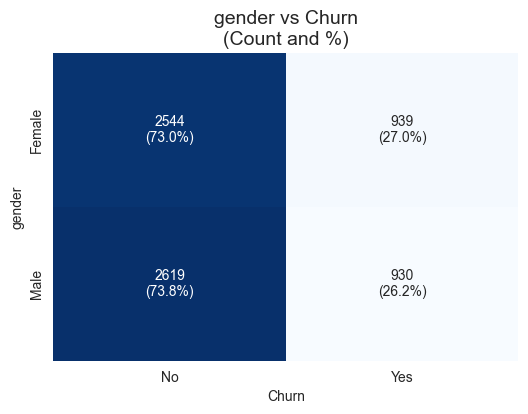

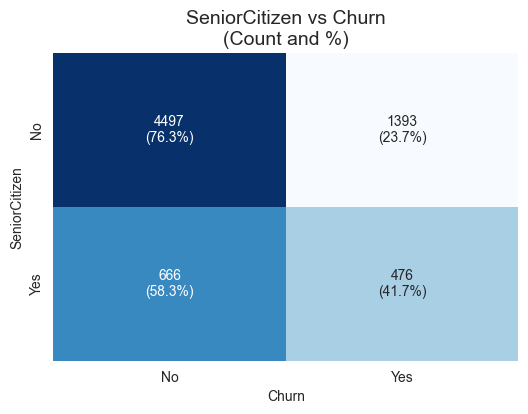

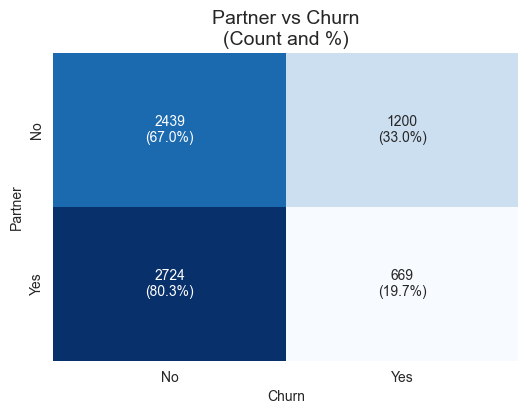

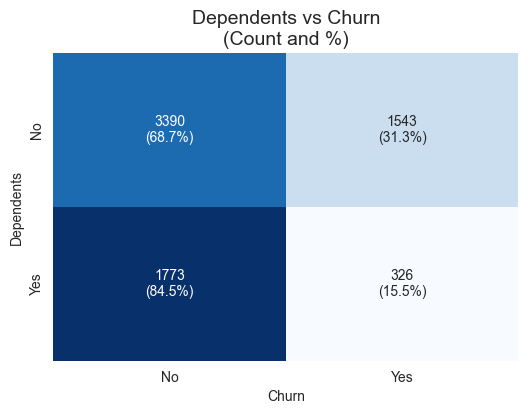

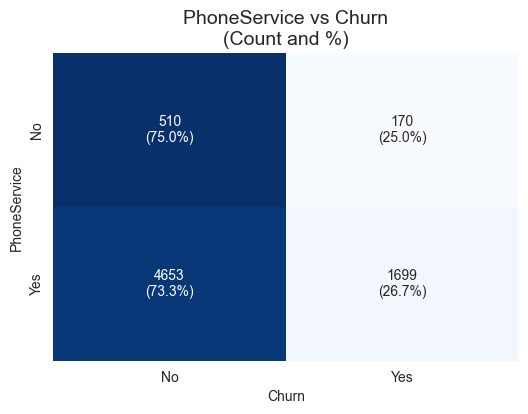

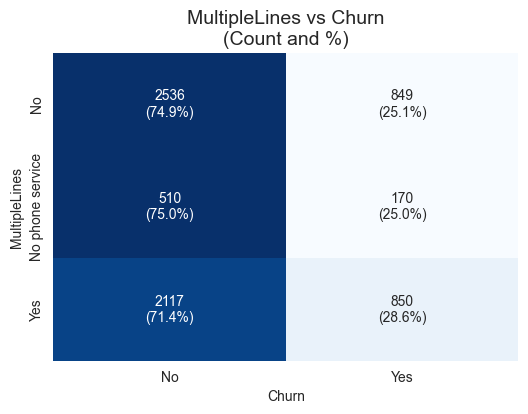

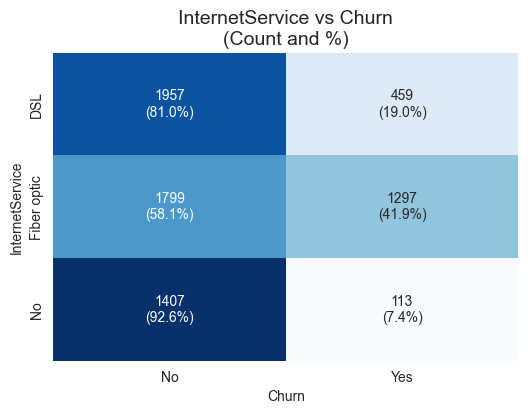

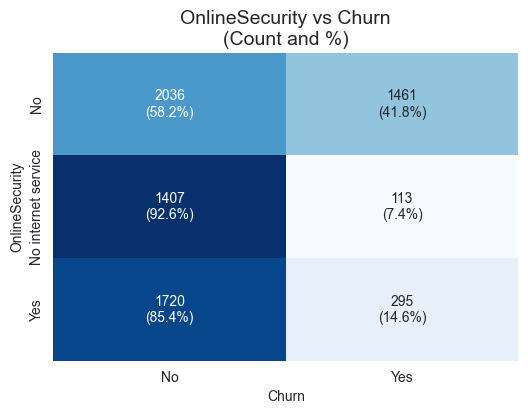

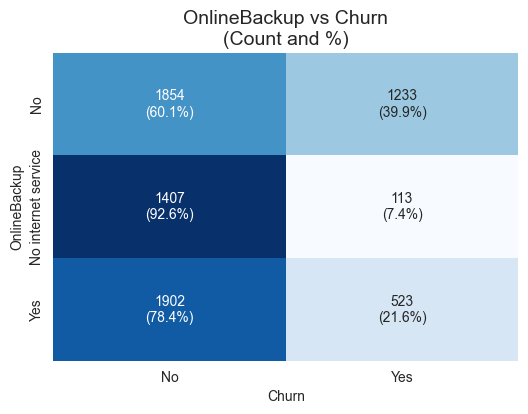

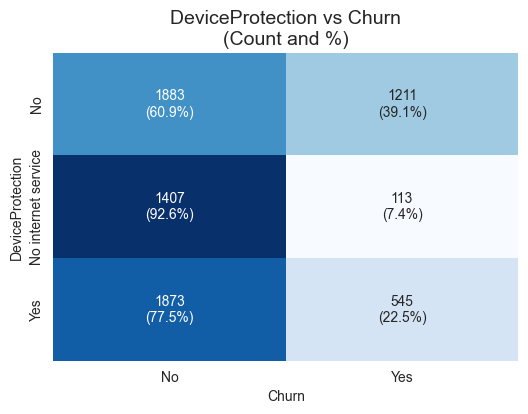

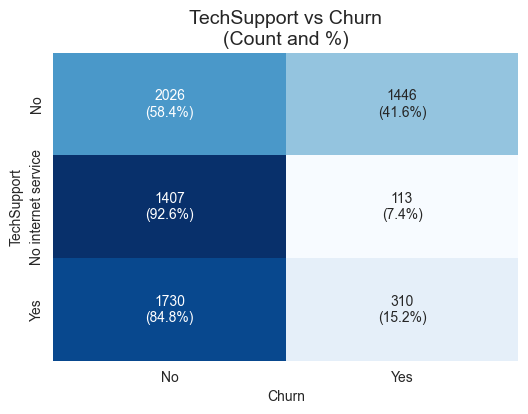

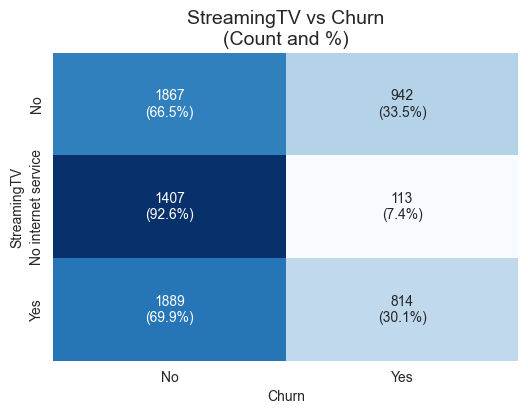

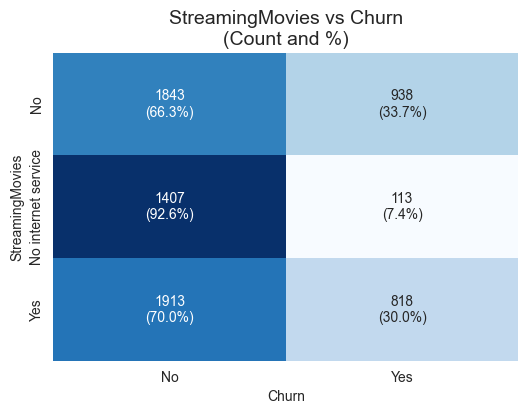

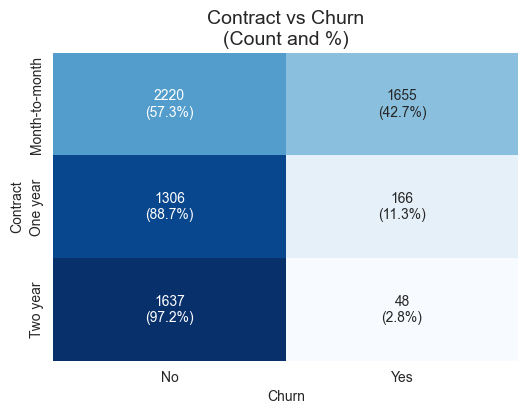

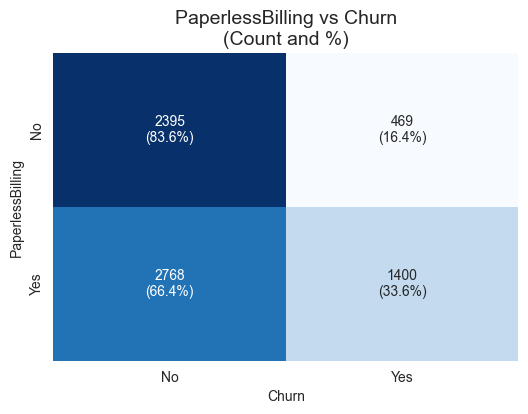

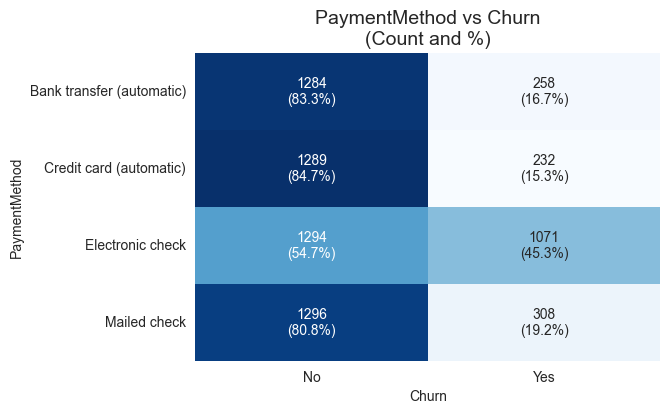

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns (excluding 'Churn')
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in cat_cols:
    # Counts
    counts = pd.crosstab(df[col], df['Churn'])
    # Percentages
    percentages = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    
    # Combine into one string "count\n(percentage%)"
    combined = counts.astype(str) + "\n(" + percentages.round(1).astype(str) + "%)"
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(percentages, annot=combined, fmt="", cmap='Blues', cbar=False)
    plt.title(f'{col} vs Churn\n(Count and %)', fontsize=14)
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()


In [55]:
## Feature Engineering

In [56]:
import pandas as pd
import numpy as np
# 1. Fix inconsistent categories
replace_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]
for col in replace_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,No,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7031,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [58]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [59]:
#Converting the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [60]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['Churn'] == 0]
df_minority = df[df['Churn'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # Sample with replacement
                                 n_samples=len(df_majority),    # To match majority class
                                 random_state=42) # Reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

df_balanced['Churn'].value_counts()


Churn
0    5163
1    5163
Name: count, dtype: int64

In [61]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10326 entries, 0 to 5581
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            10326 non-null  object 
 1   SeniorCitizen     10326 non-null  object 
 2   Partner           10326 non-null  object 
 3   Dependents        10326 non-null  object 
 4   tenure            10326 non-null  int64  
 5   PhoneService      10326 non-null  object 
 6   MultipleLines     10326 non-null  object 
 7   InternetService   10326 non-null  object 
 8   OnlineSecurity    10326 non-null  object 
 9   OnlineBackup      10326 non-null  object 
 10  DeviceProtection  10326 non-null  object 
 11  TechSupport       10326 non-null  object 
 12  StreamingTV       10326 non-null  object 
 13  StreamingMovies   10326 non-null  object 
 14  Contract          10326 non-null  object 
 15  PaperlessBilling  10326 non-null  object 
 16  PaymentMethod     10326 non-null  object 
 17 

In [62]:
df_balanced.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1187,Male,No,Yes,Yes,35,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),69.15,2490.15,0
6480,Male,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,18.85,18.85,1
1414,Male,No,Yes,Yes,67,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),89.55,6373.10,0
2362,Female,Yes,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.15,70.15,1
5661,Female,No,Yes,Yes,17,Yes,Yes,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,24.10,409.90,1
1637,Female,No,Yes,No,29,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,19.85,573.05,0
2906,Female,No,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),73.50,73.50,1
6350,Male,No,Yes,Yes,55,Yes,No,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,79.40,4238.45,0
4344,Male,Yes,Yes,No,1,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,80.30,80.30,1
5966,Male,No,Yes,Yes,7,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,89.75,608.80,1


In [63]:
df_balanced.to_csv('Churn_Prediction_Final.csv')

In [64]:
### Train Test Split of the dataset

In [65]:
X = df_balanced.drop('Churn',axis = 1 )
y = df_balanced['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

X_train.shape,X_test.shape,y_train.shape, y_test.shape


((8260, 19), (2066, 19), (8260,), (2066,))

In [66]:
X_train.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2040,Male,Yes,No,No,10,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.25,793.55
5899,Male,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.20,20.20
5538,Female,No,No,No,3,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.45,240.45
1123,Female,No,Yes,Yes,23,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,One year,Yes,Mailed check,66.25,1533.80
2722,Male,No,No,No,5,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),94.85,462.80


In [67]:
X_test.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5630,Male,No,No,No,6,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.65,109.30
2305,Male,No,No,No,57,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),90.45,5229.80
3646,Female,Yes,Yes,No,70,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Credit card (automatic),19.55,1462.05
2410,Male,No,No,No,18,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),82.00,1425.45
429,Female,No,Yes,No,68,Yes,Yes,DSL,Yes,No,No,Yes,No,No,One year,No,Bank transfer (automatic),58.25,3975.70


In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8260 entries, 2040 to 2082
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            8260 non-null   object 
 1   SeniorCitizen     8260 non-null   object 
 2   Partner           8260 non-null   object 
 3   Dependents        8260 non-null   object 
 4   tenure            8260 non-null   int64  
 5   PhoneService      8260 non-null   object 
 6   MultipleLines     8260 non-null   object 
 7   InternetService   8260 non-null   object 
 8   OnlineSecurity    8260 non-null   object 
 9   OnlineBackup      8260 non-null   object 
 10  DeviceProtection  8260 non-null   object 
 11  TechSupport       8260 non-null   object 
 12  StreamingTV       8260 non-null   object 
 13  StreamingMovies   8260 non-null   object 
 14  Contract          8260 non-null   object 
 15  PaperlessBilling  8260 non-null   object 
 16  PaymentMethod     8260 non-null   object 
 1

In [69]:
### Data Preprocessing for Model Building

In [70]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(handle_unknown='ignore',drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [4,17,18]),
            ('OHE', ohe, [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16]),
        ],
        remainder='passthrough'
)

In [71]:
preprocesser

,transformers,"[('StandardScale', ...), ('OHE', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [72]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)
X_train_dummy.shape,X_test_dummy.shape

((8260, 23), (2066, 23))

In [73]:
X_train.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2040,Male,Yes,No,No,10,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.25,793.55
5899,Male,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.20,20.20
5538,Female,No,No,No,3,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.45,240.45
1123,Female,No,Yes,Yes,23,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,One year,Yes,Mailed check,66.25,1533.80
2722,Male,No,No,No,5,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),94.85,462.80


In [74]:
X_test.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5630,Male,No,No,No,6,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.65,109.30
2305,Male,No,No,No,57,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),90.45,5229.80
3646,Female,Yes,Yes,No,70,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Credit card (automatic),19.55,1462.05
2410,Male,No,No,No,18,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),82.00,1425.45
429,Female,No,Yes,No,68,Yes,Yes,DSL,Yes,No,No,Yes,No,No,One year,No,Bank transfer (automatic),58.25,3975.70


In [75]:
### Multiple model of checking Accuracy [For Classification Problem Set]

In [76]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    XGBClassifier(),
    MLPClassifier(),
    ExtraTreesClassifier()   
]

# Create a dictionary to store the results
results = {}

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_dummy, y_train)
    y_pred = clf.predict(X_test_dummy)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} Accuracy: {accuracy}")
    
    # Classification report
    print(f"Classification Report for {clf_name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    print(f"Confusion Matrix for {clf_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("="*100)



RandomForestClassifier Accuracy: 0.909486931268151
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1064
           1       0.87      0.96      0.91      1002

    accuracy                           0.91      2066
   macro avg       0.91      0.91      0.91      2066
weighted avg       0.91      0.91      0.91      2066

Confusion Matrix for RandomForestClassifier:
[[915 149]
 [ 38 964]]
AdaBoostClassifier Accuracy: 0.7681510164569216
Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.80      0.73      0.77      1064
           1       0.74      0.81      0.77      1002

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

Confusion Matrix for AdaBoostClassifier:
[[780 284]
 [195 807]]
GradientBoostingCla

In [77]:
### Compare Performance of different Model

In [78]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall'])

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_dummy, y_train)
    y_pred = clf.predict(X_test_dummy)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    
    # Append results to DataFrame
    results_df = pd.concat([results_df,pd.DataFrame([{'Model': clf_name, 'Accuracy': accuracy, 'F1-Score': f1_score, 
                                    'Precision': precision, 'Recall': recall}])], ignore_index=True)

results_df


,Model,Accuracy,F1-Score,Precision,Recall
0,RandomForestClassifier,0.909003,0.908910,0.913446,0.909003
1,AdaBoostClassifier,0.768151,0.768020,0.770749,0.768151
2,GradientBoostingClassifier,0.782188,0.782034,0.785130,0.782188
3,LogisticRegression,0.767183,0.767026,0.769988,0.767183
4,SVC,0.788964,0.788936,0.790723,0.788964
5,KNeighborsClassifier,0.780736,0.779294,0.792976,0.780736
6,DecisionTreeClassifier,0.875121,0.874691,0.884377,0.875121
7,GaussianNB,0.747822,0.747555,0.751169,0.747822
8,XGBClassifier,0.864956,0.864657,0.871593,0.864956
9,MLPClassifier,0.806389,0.806073,0.811235,0.806389


In [79]:
### Selection of best Model and performence Evaluation

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the RandomForestClassifier
rf_classifier.fit(X_train_dummy, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_dummy)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.9046466602129719
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1064
           1       0.86      0.96      0.91      1002

    accuracy                           0.90      2066
   macro avg       0.91      0.91      0.90      2066
weighted avg       0.91      0.90      0.90      2066

Confusion Matrix for Random Forest Classifier:
[[906 158]
 [ 39 963]]


In [81]:
### Test the result

In [82]:
# test 1:
print("predcted class ",rf_classifier.predict(X_test_dummy[110].reshape(1,-1))[0])
print("actual class ", y_test.iloc[110])

predcted class  1
actual class  0


In [83]:
# test 2:
print("predcted class ",rf_classifier.predict(X_test_dummy[20].reshape(1,-1))[0])
print("actual class ", y_test.iloc[20])

predcted class  0
actual class  0


In [84]:
# test 3:
print("predcted class ",rf_classifier.predict(X_test_dummy[120].reshape(1,-1))[0])
print("actual class ", y_test.iloc[120])

predcted class  0
actual class  0


In [85]:
# test 4:
print("predcted class ",rf_classifier.predict(X_test_dummy[122].reshape(1,-1))[0])
print("actual class ", y_test.iloc[122])

predcted class  1
actual class  1


In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8260 entries, 2040 to 2082
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            8260 non-null   object 
 1   SeniorCitizen     8260 non-null   object 
 2   Partner           8260 non-null   object 
 3   Dependents        8260 non-null   object 
 4   tenure            8260 non-null   int64  
 5   PhoneService      8260 non-null   object 
 6   MultipleLines     8260 non-null   object 
 7   InternetService   8260 non-null   object 
 8   OnlineSecurity    8260 non-null   object 
 9   OnlineBackup      8260 non-null   object 
 10  DeviceProtection  8260 non-null   object 
 11  TechSupport       8260 non-null   object 
 12  StreamingTV       8260 non-null   object 
 13  StreamingMovies   8260 non-null   object 
 14  Contract          8260 non-null   object 
 15  PaperlessBilling  8260 non-null   object 
 16  PaymentMethod     8260 non-null   object 
 1

In [87]:
import numpy as np

In [88]:
def predict(gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges):
    
    # Prepare features array
    features = np.array([[gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges]], dtype=object)
    
    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)
    
    # predict by model
    result = rf_classifier.predict(transformed_features).reshape(1, -1)
    
    return result[0]

In [89]:
# test 1

gender = 'Female' 
SeniorCitizen = 'No'
Partner = 'No'
Dependents = 'No'
tenure = 6
PhoneService = 'Yes' 
MultipleLines = 'No'
InternetService = 'No'
OnlineSecurity = 'No' 
OnlineBackup = 'No'
DeviceProtection = 'No'
TechSupport = 'No'
StreamingTV = 'No'
StreamingMovies = 'No'
Contract =  'Month-to-month'
PaperlessBilling = 'No'
PaymentMethod = 'Mailed check'
MonthlyCharges = 20.65
TotalCharges = 109.30

result = predict(gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges)

if result == 1:
    print("Possibility of Churn is High")
else: 
    print("Possibility of Churn is Low")



Possibility of Churn is Low


In [90]:
# Male	No	No	No	6	Yes	No	No	No	No	No	No	No	No	Month-to-month	No	Mailed check	20.65	109.30

In [91]:
# test 2

gender = 'Female' 
SeniorCitizen = 'Yes'
Partner = 'Yes'
Dependents = 'No'
tenure = 40
PhoneService = 'No' 
MultipleLines = 'No'
InternetService = 'DSL'
OnlineSecurity = 'No' 
OnlineBackup = 'Yes'
DeviceProtection = 'No'
TechSupport = 'No'
StreamingTV = 'Yes'
StreamingMovies = 'No'
Contract =  'Month-to-month'
PaperlessBilling = 'Yes'
PaymentMethod = 'Electronic check'
MonthlyCharges = 39.3
TotalCharges = 1637.4

result = predict(gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges)

if result == 1:
    print("Possibility of Churn is High")
else: 
    print("Possibility of Churn is Low")



Possibility of Churn is High


In [92]:
# Female	Yes	Yes	No	40	No	No	DSL	No	Yes	No	No	Yes	No	Month-to-month	Yes	Electronic check	39.3	1637.4

In [93]:
### Creation of Pickel file to use code in Website building

In [94]:
import pickle
pickle.dump(rf_classifier,open('rf_classifier.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))

In [95]:
### Showing Model Metrics 

Accuracy: 0.7848, Precision: 0.6219, Recall: 0.4866, F1: 0.5460, ROC-AUC: 0.8190, PR-AUC: 0.5980


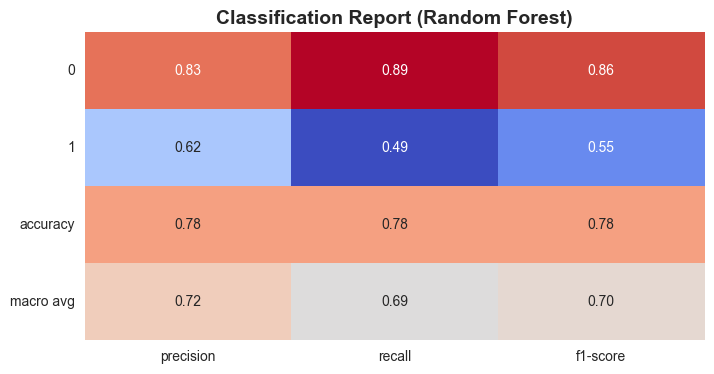

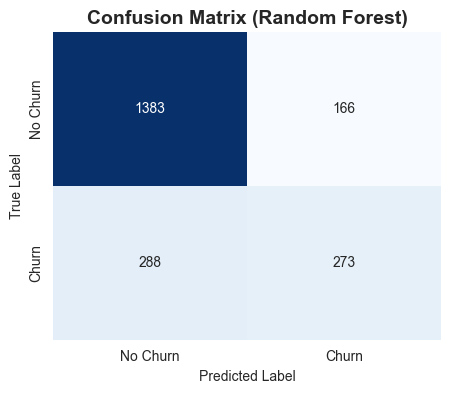

In [96]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve, average_precision_score,
    classification_report, confusion_matrix
)

# -------------------------
# Data Preparation
# -------------------------
# Features & Target
X = df[['gender','SeniorCitizen','Partner','Dependents','tenure',
        'PhoneService','MultipleLines','InternetService','OnlineSecurity',
        'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
        'StreamingMovies','Contract','PaperlessBilling','PaymentMethod',
        'MonthlyCharges','TotalCharges']]
y = df['Churn']

# Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode target
y = LabelEncoder().fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standard Scaling
scale = StandardScaler()
preprocessor = ColumnTransformer(transformers=[('scale', scale, X.columns)], remainder='passthrough')
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# -------------------------
# Train Random Forest
# -------------------------
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test_scaled)
y_proba = rf_classifier.predict_proba(X_test_scaled)[:, 1]

# -------------------------
# Metrics Calculation
# -------------------------
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, "
      f"F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}, PR-AUC: {avg_precision:.4f}")

# -------------------------
# Classification Report Heatmap
# -------------------------
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(8,4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", fmt=".2f", cbar=False)
plt.title("Classification Report (Random Forest)", fontsize=14, fontweight="bold")
plt.yticks(rotation=0)
plt.show()

# -------------------------
# Confusion Matrix Heatmap
# -------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix (Random Forest)", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



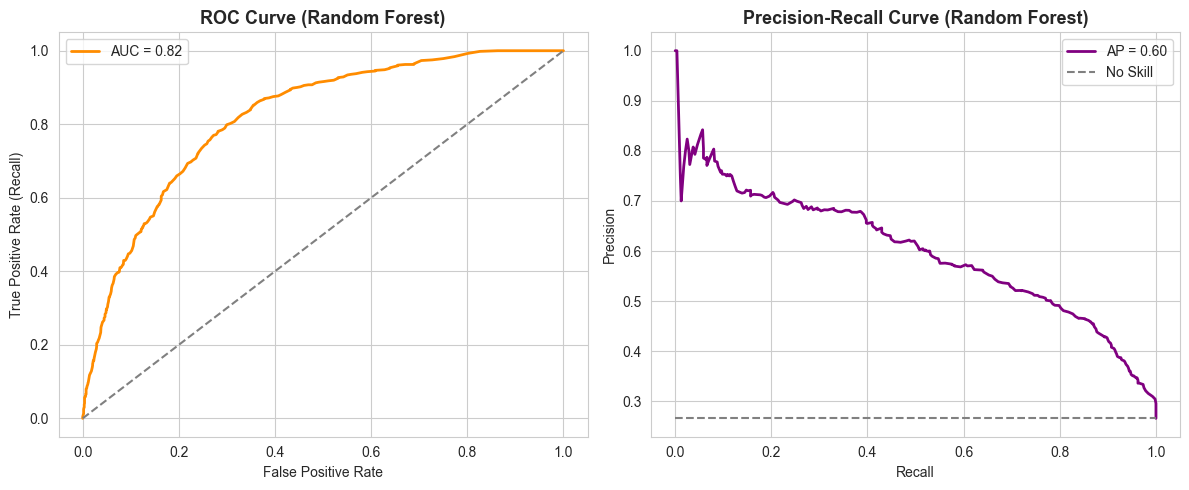

In [97]:
# -------------------------
# ROC & Precision-Recall Curves
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
axes[0].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="darkorange", linewidth=2)
axes[0].plot([0,1], [0,1], linestyle="--", color="gray")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate (Recall)")
axes[0].set_title("ROC Curve (Random Forest)", fontsize=13, fontweight="bold")
axes[0].legend()
axes[0].grid(True)

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
axes[1].plot(recall_vals, precision_vals, color="purple", linewidth=2, label=f"AP = {avg_precision:.2f}")
# Baseline
no_skill = sum(y_test)/len(y_test)
axes[1].hlines(no_skill, 0, 1, linestyle='--', color='gray', label='No Skill')
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].set_title("Precision-Recall Curve (Random Forest)", fontsize=13, fontweight="bold")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


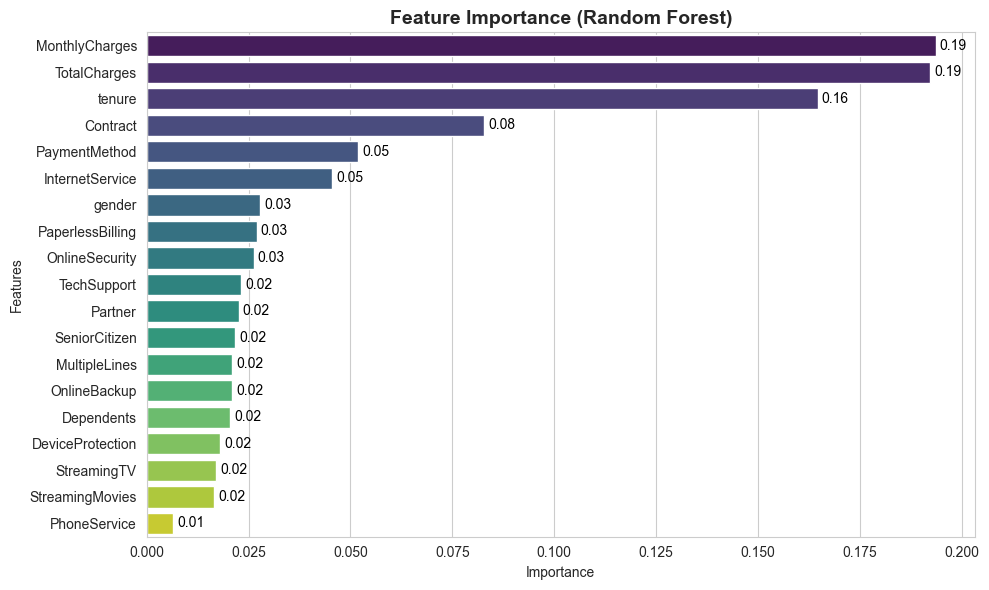

In [98]:
# -------------------------
# Feature Importance Plot
# -------------------------
importances = rf_classifier.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Feature Importance (Random Forest)", fontsize=14, fontweight="bold")
plt.xlabel("Importance")
plt.ylabel("Features")
# Annotate bars
for i, v in enumerate(importances[indices]):
    plt.text(v + 0.001, i, f"{v:.2f}", color='black', va='center')
plt.tight_layout()
plt.show()


In [99]:
# Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve, average_precision_score,
    classification_report, confusion_matrix
)

# ==== Setup Output Folder ====
output_dir = "telecom_model_results"
os.makedirs(output_dir, exist_ok=True)

# ==== Data Preparation ====
X = df[['gender','SeniorCitizen','Partner','Dependents','tenure',
        'PhoneService','MultipleLines','InternetService','OnlineSecurity',
        'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
        'StreamingMovies','Contract','PaperlessBilling','PaymentMethod',
        'MonthlyCharges','TotalCharges']]
y = df['Churn']

# Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode target
y = LabelEncoder().fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standard Scaling
scale = StandardScaler()
preprocessor = ColumnTransformer(transformers=[('scale', scale, X.columns)], remainder='passthrough')
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# ==== Train Random Forest ====
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test_scaled)
y_proba = rf_classifier.predict_proba(X_test_scaled)[:, 1]

# ==== Metrics Calculation ====
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, "
      f"F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}, PR-AUC: {avg_precision:.4f}")

# ==== Classification Report Heatmap ====
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", fmt=".2f", cbar=False)
plt.title("Classification Report (Random Forest)", fontsize=14, fontweight="bold")
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "classification_report.png"))
plt.savefig(os.path.join(output_dir, "classification_report.pdf"))
plt.close()

# ==== Confusion Matrix Heatmap ====
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix (Random Forest)", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "confusion_matrix.png"))
plt.savefig(os.path.join(output_dir, "confusion_matrix.pdf"))
plt.close()

# ==== ROC & Precision-Recall Curves ====
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
axes[0].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="darkorange", linewidth=2)
axes[0].plot([0,1], [0,1], linestyle="--", color="gray")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate (Recall)")
axes[0].set_title("ROC Curve (Random Forest)", fontsize=13, fontweight="bold")
axes[0].legend()
axes[0].grid(True)

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
axes[1].plot(recall_vals, precision_vals, color="purple", linewidth=2, label=f"AP = {avg_precision:.2f}")
# Baseline
no_skill = sum(y_test)/len(y_test)
axes[1].hlines(no_skill, 0, 1, linestyle='--', color='gray', label='No Skill')
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].set_title("Precision-Recall Curve (Random Forest)", fontsize=13, fontweight="bold")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "roc_pr_curves.png"))
plt.savefig(os.path.join(output_dir, "roc_pr_curves.pdf"))
plt.close()

# ==== Feature Importance ====
importances = rf_classifier.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Feature Importance (Random Forest)", fontsize=14, fontweight="bold")
plt.xlabel("Importance")
plt.ylabel("Features")
# Annotate bars
for i, v in enumerate(importances[indices]):
    plt.text(v + 0.001, i, f"{v:.2f}", color='black', va='center')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "feature_importance.png"))
plt.savefig(os.path.join(output_dir, "feature_importance.pdf"))
plt.close()

print(f"\n✅ All Telecom model plots saved in folder: {output_dir}")


Accuracy: 0.7848, Precision: 0.6219, Recall: 0.4866, F1: 0.5460, ROC-AUC: 0.8190, PR-AUC: 0.5980

✅ All Telecom model plots saved in folder: telecom_model_results


In [ ]:
### Hypothesis Testing Summary Table

             Feature  Chi2 Statistic  p-value  Degrees of Freedom  \
1      SeniorCitizen         158.441   0.0000                   1   
2            Partner         157.503   0.0000                   1   
3         Dependents         186.322   0.0000                   1   
6    InternetService         728.696   0.0000                   2   
7     OnlineSecurity         205.416   0.0000                   1   
8       OnlineBackup          47.247   0.0000                   1   
9   DeviceProtection          30.496   0.0000                   1   
10       TechSupport         189.967   0.0000                   1   
11       StreamingTV          27.842   0.0000                   1   
12   StreamingMovies          25.764   0.0000                   1   
13          Contract        1179.546   0.0000                   2   
14  PaperlessBilling         256.875   0.0000                   1   
15     PaymentMethod         645.430   0.0000                   3   
5      MultipleLines          11.0

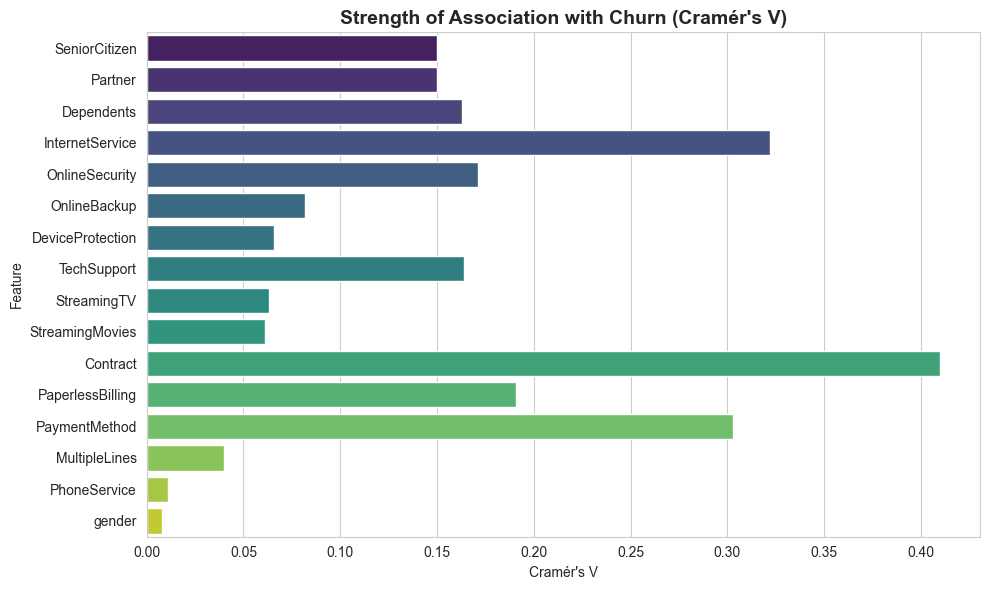

In [100]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv("Churn_Prediction_Final.csv")  # Uncomment if needed

# Initialize list to store results
chi2_results = []

# Loop through categorical columns (exclude target)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if col != 'Churn':
        ct = pd.crosstab(df[col], df['Churn'])
        chi2, p, dof, expected = chi2_contingency(ct)
        # Compute Cramér's V
        n = ct.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * (min(ct.shape)-1)))
        
        chi2_results.append({
            'Feature': col,
            'Chi2 Statistic': round(chi2, 3),
            'p-value': round(p, 4),
            'Degrees of Freedom': dof,
            'Significant?': 'Yes' if p < 0.05 else 'No',
            "Cramers V": round(cramers_v, 3)
        })

# Convert results to DataFrame
chi2_df = pd.DataFrame(chi2_results)

# Sort by p-value for better interpretation
chi2_df = chi2_df.sort_values('p-value')

# Display table
print(chi2_df)

# ---------------- Visual Summary ----------------
plt.figure(figsize=(10,6))
sns.barplot(x='Cramers V', y='Feature', data=chi2_df, palette='viridis')
plt.title('Strength of Association with Churn (Cramér\'s V)', fontsize=14, fontweight='bold')
plt.xlabel('Cramér\'s V')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
